In [3415]:
#Making imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [3416]:
#Reading file
data = pd.read_csv('train.csv')

In [3417]:
#Checking

pd.set_option('display.max_columns', None)
data.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


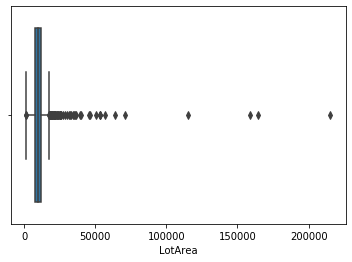

In [3418]:
#Examining some boxplots for numeric variables. There seem to be plenty of outliers.
sns.boxplot(data['LotArea'])

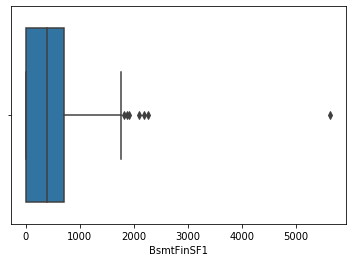

In [3419]:
#Examining some boxplots for numeric variables. There seem to be plenty of outliers. Median seems to be around 500.

sns.boxplot(data['BsmtFinSF1'])

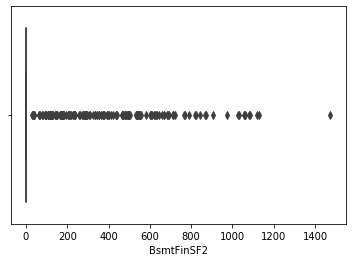

In [3420]:
#Examining some boxplots for numeric variables. There seem to be so many outliers that the box is getting highly compressed.

sns.boxplot(data['BsmtFinSF2'])

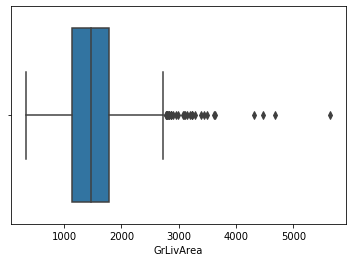

In [3421]:
#Examining some boxplots for numeric variables. Quite a few outliers. Median seems to be around 1500.

sns.boxplot(data['GrLivArea'])

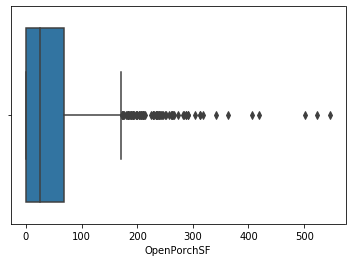

In [3422]:
#Examining some boxplots for numeric variables. Many outliers. Median seems to be ~40.

sns.boxplot(data['OpenPorchSF'])

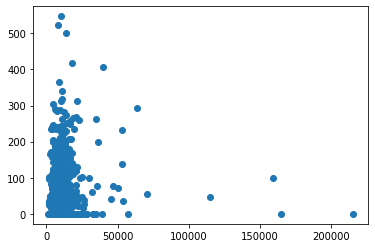

In [3423]:
#LotArea range seems small, though OpenPorchSF seems to have a wider range.
plt.scatter(x = data['LotArea'], y = data['OpenPorchSF'] )

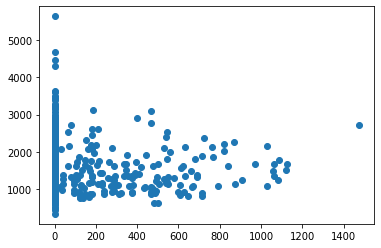

In [3424]:
#GrLivArea seems to mostly range up to a maximum of over 3000 units. BsmtFinSF2 ranges from 0 to around 1200 units.
plt.scatter(x = data['BsmtFinSF2'], y = data['GrLivArea'] )

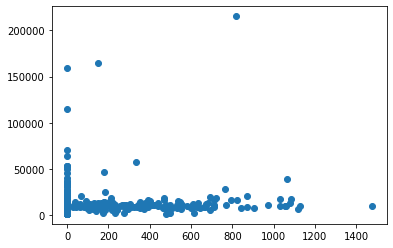

In [3425]:
#Lot area does not seem to rise too much even if BsmtFinSF2 rises.
plt.scatter(x = data['BsmtFinSF2'], y = data['LotArea'] )

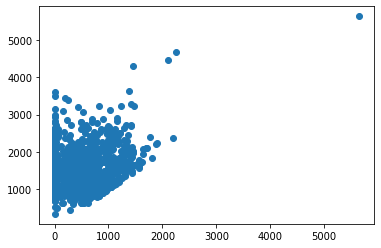

In [3426]:
#Most values concentrated to the lower left of the plot. A low BsmtFinSF1 is usually seen with low GrLivArea
plt.scatter(x = data['BsmtFinSF1'], y = data['GrLivArea'] )

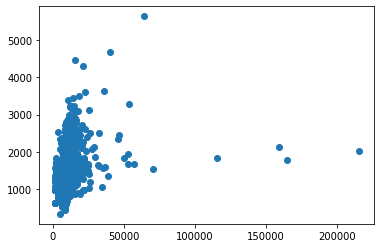

In [3427]:
#Not too many high values of GrLivArea. Low LotArea also usually seems to be accompanied by low GrLivArea
plt.scatter(x = data['LotArea'], y = data['GrLivArea'] )

In [3428]:
#Checking

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
Unnamed: 0       1460 non-null int64
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-nu

In [3429]:
#Checking

data.shape

(1460, 82)

In [3430]:
#Checking

data.describe()

,Unnamed: 0,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,729.500000,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,0.000000,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,364.750000,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,729.500000,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1094.250000,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1459.000000,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [3431]:
#Checking

data.nunique().sort_values()

CentralAir          2
Street              2
Alley               2
Utilities           2
PoolQC              3
PavedDrive          3
BsmtHalfBath        3
GarageFinish        3
HalfBath            3
LandSlope           3
FullBath            4
BsmtFullBath        4
Fence               4
MiscFeature         4
ExterQual           4
BsmtQual            4
BsmtCond            4
BsmtExposure        4
MasVnrType          4
KitchenAbvGr        4
Fireplaces          4
LandContour         4
LotShape            4
KitchenQual         4
HeatingQC           5
FireplaceQu         5
BldgType            5
GarageCars          5
LotConfig           5
ExterCond           5
                 ... 
MoSold             12
TotRmsAbvGrd       12
Exterior1st        15
MSSubClass         15
Exterior2nd        16
3SsnPorch          20
MiscVal            21
LowQualFinSF       24
Neighborhood       25
YearRemodAdd       61
ScreenPorch        76
GarageYrBlt        97
LotFrontage       110
YearBuilt         112
EnclosedPo

In [3432]:
#Checking

fullmissingvaluelist = data.isnull().sum()
for key,value in fullmissingvaluelist.iteritems():
    print(key,",",round((value / data.shape[0])*100,2))

Unnamed: 0 , 0.0
Id , 0.0
MSSubClass , 0.0
MSZoning , 0.0
LotFrontage , 17.74
LotArea , 0.0
Street , 0.0
Alley , 93.77
LotShape , 0.0
LandContour , 0.0
Utilities , 0.0
LotConfig , 0.0
LandSlope , 0.0
Neighborhood , 0.0
Condition1 , 0.0
Condition2 , 0.0
BldgType , 0.0
HouseStyle , 0.0
OverallQual , 0.0
OverallCond , 0.0
YearBuilt , 0.0
YearRemodAdd , 0.0
RoofStyle , 0.0
RoofMatl , 0.0
Exterior1st , 0.0
Exterior2nd , 0.0
MasVnrType , 0.55
MasVnrArea , 0.55
ExterQual , 0.0
ExterCond , 0.0
Foundation , 0.0
BsmtQual , 2.53
BsmtCond , 2.53
BsmtExposure , 2.6
BsmtFinType1 , 2.53
BsmtFinSF1 , 0.0
BsmtFinType2 , 2.6
BsmtFinSF2 , 0.0
BsmtUnfSF , 0.0
TotalBsmtSF , 0.0
Heating , 0.0
HeatingQC , 0.0
CentralAir , 0.0
Electrical , 0.07
1stFlrSF , 0.0
2ndFlrSF , 0.0
LowQualFinSF , 0.0
GrLivArea , 0.0
BsmtFullBath , 0.0
BsmtHalfBath , 0.0
FullBath , 0.0
HalfBath , 0.0
BedroomAbvGr , 0.0
KitchenAbvGr , 0.0
KitchenQual , 0.0
TotRmsAbvGrd , 0.0
Functional , 0.0
Fireplaces , 0.0
FireplaceQu , 47.26
GarageT

In [3433]:
#Replacing NA with meaningful values

data['FireplaceQu']= data['FireplaceQu'].replace(np.nan, 'No Fireplace')

In [3434]:
#Checking

data['FireplaceQu'].value_counts(normalize = True)

No Fireplace    0.472603
Gd              0.260274
TA              0.214384
Fa              0.022603
Ex              0.016438
Po              0.013699
Name: FireplaceQu, dtype: float64

In [3435]:
#Checking

round(((data['FireplaceQu'].isnull().sum(axis = 0))/data.shape[0]*100),2)

0.0

In [3436]:
#Checking

data['PoolQC'].value_counts(normalize = True)

Gd    0.428571
Fa    0.285714
Ex    0.285714
Name: PoolQC, dtype: float64

In [3437]:
#Replacing NA with meaningful values

data['PoolQC']= data['PoolQC'].replace(np.nan, 'No Pool')

In [3438]:
#Checking

data['PoolQC'].value_counts(normalize = True)

No Pool    0.995205
Gd         0.002055
Fa         0.001370
Ex         0.001370
Name: PoolQC, dtype: float64

In [3439]:
#Checking

round(((data['PoolQC'].isnull().sum(axis = 0))/data.shape[0]*100),2)

0.0

In [3440]:
#Checking

data['Fence'].value_counts(normalize = True)

MnPrv    0.558719
GdPrv    0.209964
GdWo     0.192171
MnWw     0.039146
Name: Fence, dtype: float64

In [3441]:
#Replacing NA with meaningful values

data['Fence']= data['Fence'].replace(np.nan, 'No Fence')

In [3442]:
#Checking

data['Fence'].value_counts(normalize = True)

No Fence    0.807534
MnPrv       0.107534
GdPrv       0.040411
GdWo        0.036986
MnWw        0.007534
Name: Fence, dtype: float64

In [3443]:
#Checking

round(((data['Fence'].isnull().sum(axis = 0))/data.shape[0]*100),2)

0.0

In [3444]:
#Checking

data['MiscFeature'].value_counts(normalize = True)

Shed    0.907407
Gar2    0.037037
Othr    0.037037
TenC    0.018519
Name: MiscFeature, dtype: float64

In [3445]:
#Replacing NA with meaningful values

data['MiscFeature']= data['MiscFeature'].replace(np.nan, 'None')

In [3446]:
#Checking

data['MiscFeature'].value_counts(normalize = True)

None    0.963014
Shed    0.033562
Gar2    0.001370
Othr    0.001370
TenC    0.000685
Name: MiscFeature, dtype: float64

In [3447]:
#Checking

round(((data['MiscFeature'].isnull().sum(axis = 0))/data.shape[0]*100),2)

0.0

In [3448]:
#Checking

data['Alley'].value_counts(normalize = True)

Grvl    0.549451
Pave    0.450549
Name: Alley, dtype: float64

In [3449]:
#Replacing NA with meaningful values
data['Alley']= data['Alley'].replace(np.nan, 'No alley access')

In [3450]:
#Checking

data['Alley'].value_counts(normalize = True)

No alley access    0.937671
Grvl               0.034247
Pave               0.028082
Name: Alley, dtype: float64

In [3451]:
#Checking
round(((data['Alley'].isnull().sum(axis = 0))/data.shape[0]*100),2)

0.0

PoolQC, Fence, MiscFeature and Alley are being dropped as they have highly skewed value distribution of >=80%. Also, 'Unnamed:0' will be dropped as it just refers to the row number in the raw data and does not add any value to the analysis.

In [3452]:
#Dropping the variables mentioned above
data.drop(columns = ['PoolQC','Fence', 'MiscFeature', 'Alley', 'Unnamed: 0'], axis = 1, inplace = True)

In [3453]:
#Checking
fullmissingvaluelist = data.isnull().sum()
for key,value in fullmissingvaluelist.iteritems():
    print(key,",",round((value / data.shape[0])*100,2))

Id , 0.0
MSSubClass , 0.0
MSZoning , 0.0
LotFrontage , 17.74
LotArea , 0.0
Street , 0.0
LotShape , 0.0
LandContour , 0.0
Utilities , 0.0
LotConfig , 0.0
LandSlope , 0.0
Neighborhood , 0.0
Condition1 , 0.0
Condition2 , 0.0
BldgType , 0.0
HouseStyle , 0.0
OverallQual , 0.0
OverallCond , 0.0
YearBuilt , 0.0
YearRemodAdd , 0.0
RoofStyle , 0.0
RoofMatl , 0.0
Exterior1st , 0.0
Exterior2nd , 0.0
MasVnrType , 0.55
MasVnrArea , 0.55
ExterQual , 0.0
ExterCond , 0.0
Foundation , 0.0
BsmtQual , 2.53
BsmtCond , 2.53
BsmtExposure , 2.6
BsmtFinType1 , 2.53
BsmtFinSF1 , 0.0
BsmtFinType2 , 2.6
BsmtFinSF2 , 0.0
BsmtUnfSF , 0.0
TotalBsmtSF , 0.0
Heating , 0.0
HeatingQC , 0.0
CentralAir , 0.0
Electrical , 0.07
1stFlrSF , 0.0
2ndFlrSF , 0.0
LowQualFinSF , 0.0
GrLivArea , 0.0
BsmtFullBath , 0.0
BsmtHalfBath , 0.0
FullBath , 0.0
HalfBath , 0.0
BedroomAbvGr , 0.0
KitchenAbvGr , 0.0
KitchenQual , 0.0
TotRmsAbvGrd , 0.0
Functional , 0.0
Fireplaces , 0.0
FireplaceQu , 0.0
GarageType , 5.55
GarageYrBlt , 5.55
Gar

Pending variables with missing values will now be examined. This includes: LotFrontage, MasVnrType, MasVnrArea,BsmtQual,BsmtCond, BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical, GarageType, GarageYrBlt,GarageFinish, GarageQual,GarageCond 

In [3454]:
#Checking

data['BsmtQual'].value_counts(normalize = True)

TA    0.456079
Gd    0.434294
Ex    0.085032
Fa    0.024596
Name: BsmtQual, dtype: float64

In [3455]:
#Replacing NA with No Basement
data['BsmtQual']= data['BsmtQual'].replace(np.nan, 'No Basement')

In [3456]:
#Checking

data['BsmtQual'].value_counts(normalize = True)

TA             0.444521
Gd             0.423288
Ex             0.082877
No Basement    0.025342
Fa             0.023973
Name: BsmtQual, dtype: float64

In [3457]:
#Checking
round(((data['BsmtQual'].isnull().sum(axis = 0))/data.shape[0]*100),2)

0.0

In [3458]:
#Checking
data['BsmtCond'].value_counts(normalize = True)

TA    0.921293
Gd    0.045678
Fa    0.031623
Po    0.001405
Name: BsmtCond, dtype: float64

In [3459]:
#Replacing NA with No Basement
data['BsmtCond']= data['BsmtCond'].replace(np.nan, 'No Basement')

In [3460]:
#Checking
data['BsmtCond'].value_counts(normalize = True)

TA             0.897945
Gd             0.044521
Fa             0.030822
No Basement    0.025342
Po             0.001370
Name: BsmtCond, dtype: float64

In [3461]:
#Checking

round(((data['BsmtCond'].isnull().sum(axis = 0))/data.shape[0]*100),2)

0.0

In [3462]:
#Checking

data['BsmtExposure'].value_counts(normalize = True)

No    0.670183
Av    0.155415
Gd    0.094233
Mn    0.080169
Name: BsmtExposure, dtype: float64

In [3463]:
#Replacing NA with No Basement
data['BsmtExposure']= data['BsmtExposure'].replace(np.nan, 'No Basement')

In [3464]:
#Checking

data['BsmtExposure'].value_counts(normalize = True)

No             0.652740
Av             0.151370
Gd             0.091781
Mn             0.078082
No Basement    0.026027
Name: BsmtExposure, dtype: float64

In [3465]:
#Checking

round(((data['BsmtCond'].isnull().sum(axis = 0))/data.shape[0]*100),2)

0.0

In [3466]:
#Checking

data['BsmtFinType1'].value_counts(normalize = True)

Unf    0.302178
GLQ    0.293746
ALQ    0.154603
BLQ    0.104006
Rec    0.093465
LwQ    0.052003
Name: BsmtFinType1, dtype: float64

In [3467]:
#Replacing NA with No Basement
data['BsmtFinType1']= data['BsmtFinType1'].replace(np.nan, 'No Basement')

In [3468]:
#Checking

data['BsmtFinType1'].value_counts(normalize = True)

Unf            0.294521
GLQ            0.286301
ALQ            0.150685
BLQ            0.101370
Rec            0.091096
LwQ            0.050685
No Basement    0.025342
Name: BsmtFinType1, dtype: float64

In [3469]:
#Checking
round(((data['BsmtFinType1'].isnull().sum(axis = 0))/data.shape[0]*100),2)

0.0

In [3470]:
#Checking
data['BsmtFinType2'].value_counts(normalize = True)

Unf    0.883263
Rec    0.037975
LwQ    0.032349
BLQ    0.023207
ALQ    0.013361
GLQ    0.009845
Name: BsmtFinType2, dtype: float64

In [3471]:
#Replacing NA with No Basement
data['BsmtFinType2']= data['BsmtFinType2'].replace(np.nan, 'No Basement')

In [3472]:
#Checking
data['BsmtFinType2'].value_counts(normalize = True)

Unf            0.860274
Rec            0.036986
LwQ            0.031507
No Basement    0.026027
BLQ            0.022603
ALQ            0.013014
GLQ            0.009589
Name: BsmtFinType2, dtype: float64

In [3473]:
#Checking
round(((data['BsmtFinType2'].isnull().sum(axis = 0))/data.shape[0]*100),2)

0.0

In [3474]:
#Checking
data['Electrical'].value_counts(normalize = True)
#Shows a highly skewed value distribution

SBrkr    0.914325
FuseA    0.064428
FuseF    0.018506
FuseP    0.002056
Mix      0.000685
Name: Electrical, dtype: float64

In [3475]:
#Checking
data['GarageType'].value_counts(normalize = True)

Attchd     0.630892
Detchd     0.280638
BuiltIn    0.063814
Basment    0.013778
CarPort    0.006526
2Types     0.004351
Name: GarageType, dtype: float64

In [3476]:
#Replacing NA with No Garage
data['GarageType']= data['GarageType'].replace(np.nan, 'No Garage')

In [3477]:
#Checking
data['GarageType'].value_counts(normalize = True)

Attchd       0.595890
Detchd       0.265068
BuiltIn      0.060274
No Garage    0.055479
Basment      0.013014
CarPort      0.006164
2Types       0.004110
Name: GarageType, dtype: float64

In [3478]:
#Checking
round(((data['GarageType'].isnull().sum(axis = 0))/data.shape[0]*100),2)

0.0

In [3479]:
#Checking
data['GarageFinish'].value_counts(normalize = True)

Unf    0.438724
RFn    0.306019
Fin    0.255257
Name: GarageFinish, dtype: float64

In [3480]:
#Replacing NA with No Garage
data['GarageFinish']= data['GarageFinish'].replace(np.nan, 'No Garage')

In [3481]:
#Checking
data['GarageFinish'].value_counts(normalize = True)

Unf          0.414384
RFn          0.289041
Fin          0.241096
No Garage    0.055479
Name: GarageFinish, dtype: float64

In [3482]:
#Checking
round(((data['GarageFinish'].isnull().sum(axis = 0))/data.shape[0]*100),2)

0.0

In [3483]:
#Checking
data['GarageQual'].value_counts(normalize = True)

TA    0.950689
Fa    0.034808
Gd    0.010152
Po    0.002175
Ex    0.002175
Name: GarageQual, dtype: float64

In [3484]:
#Replacing the NA with No Garage
data['GarageQual']= data['GarageQual'].replace(np.nan, 'No Garage')

In [3485]:
#Checking
data['GarageQual'].value_counts(normalize = True)

TA           0.897945
No Garage    0.055479
Fa           0.032877
Gd           0.009589
Po           0.002055
Ex           0.002055
Name: GarageQual, dtype: float64

In [3486]:
#Checking

round(((data['GarageQual'].isnull().sum(axis = 0))/data.shape[0]*100),2)

0.0

In [3487]:
#Checking

data['GarageCond'].value_counts(normalize = True)

TA    0.961566
Fa    0.025381
Gd    0.006526
Po    0.005076
Ex    0.001450
Name: GarageCond, dtype: float64

In [3488]:
#Replacing the NA with No Garage
data['GarageCond']= data['GarageCond'].replace(np.nan, 'No Garage')

In [3489]:
#Checking
data['GarageCond'].value_counts(normalize = True)

TA           0.908219
No Garage    0.055479
Fa           0.023973
Gd           0.006164
Po           0.004795
Ex           0.001370
Name: GarageCond, dtype: float64

In [3490]:
#Checking

round(((data['GarageCond'].isnull().sum(axis = 0))/data.shape[0]*100),2)

0.0

In [3491]:
#Dropping these columns as their value distributions are highly skewed
data.drop(columns = ['BsmtCond','BsmtFinType2', 'Electrical', 'GarageQual', 'GarageCond'], axis = 1, inplace = True)

In [3492]:
#Checking
fullmissingvaluelist = data.isnull().sum()
for key,value in fullmissingvaluelist.iteritems():
    print(key,",",round((value / data.shape[0])*100,2))

Id , 0.0
MSSubClass , 0.0
MSZoning , 0.0
LotFrontage , 17.74
LotArea , 0.0
Street , 0.0
LotShape , 0.0
LandContour , 0.0
Utilities , 0.0
LotConfig , 0.0
LandSlope , 0.0
Neighborhood , 0.0
Condition1 , 0.0
Condition2 , 0.0
BldgType , 0.0
HouseStyle , 0.0
OverallQual , 0.0
OverallCond , 0.0
YearBuilt , 0.0
YearRemodAdd , 0.0
RoofStyle , 0.0
RoofMatl , 0.0
Exterior1st , 0.0
Exterior2nd , 0.0
MasVnrType , 0.55
MasVnrArea , 0.55
ExterQual , 0.0
ExterCond , 0.0
Foundation , 0.0
BsmtQual , 0.0
BsmtExposure , 0.0
BsmtFinType1 , 0.0
BsmtFinSF1 , 0.0
BsmtFinSF2 , 0.0
BsmtUnfSF , 0.0
TotalBsmtSF , 0.0
Heating , 0.0
HeatingQC , 0.0
CentralAir , 0.0
1stFlrSF , 0.0
2ndFlrSF , 0.0
LowQualFinSF , 0.0
GrLivArea , 0.0
BsmtFullBath , 0.0
BsmtHalfBath , 0.0
FullBath , 0.0
HalfBath , 0.0
BedroomAbvGr , 0.0
KitchenAbvGr , 0.0
KitchenQual , 0.0
TotRmsAbvGrd , 0.0
Functional , 0.0
Fireplaces , 0.0
FireplaceQu , 0.0
GarageType , 0.0
GarageYrBlt , 5.55
GarageFinish , 0.0
GarageCars , 0.0
GarageArea , 0.0
PavedD

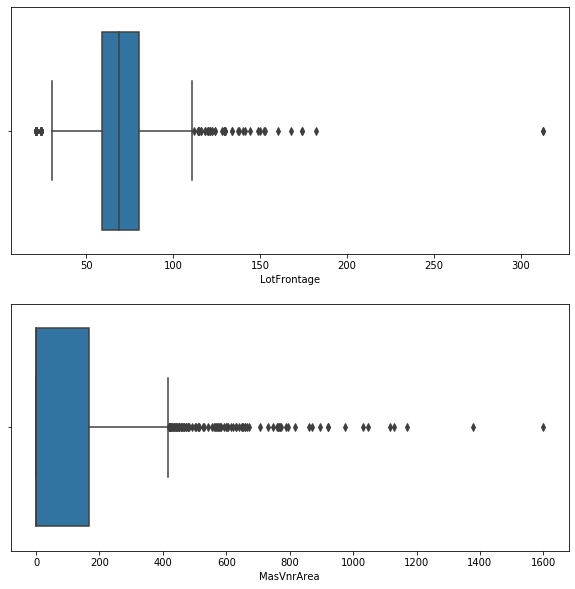

In [3493]:
#Checking the box plots for the two continuous variables that have missing values
plt.figure(figsize=(10, 10))
plt.subplot(2,1,1)
sns.boxplot(data['LotFrontage'])
plt.subplot(2,1,2)
sns.boxplot(data['MasVnrArea'])
plt.show()

In [3494]:
#As outliers are present for LotFrontage and MasVnrArea, imputing with median as it is meaningful.
data['LotFrontage'].median()

69.0

In [3495]:
#Checking
data['MasVnrArea'].median()

0.0

In [3496]:
#Imputing with median values for missing values
data[['LotFrontage']] = data[['LotFrontage']].fillna(value='69')
data[['MasVnrArea']] = data[['MasVnrArea']].fillna(value='0')

In [3497]:
#Checking
round(((data['LotFrontage'].isnull().sum(axis = 0))/data.shape[0]*100),2)

0.0

In [3498]:
#Checking
round(((data['MasVnrArea'].isnull().sum(axis = 0))/data.shape[0]*100),2)

0.0

In [3499]:
#Checking
fullmissingvaluelist = data.isnull().sum()
for key,value in fullmissingvaluelist.iteritems():
    print(key,",",round((value / data.shape[0])*100,2))

Id , 0.0
MSSubClass , 0.0
MSZoning , 0.0
LotFrontage , 0.0
LotArea , 0.0
Street , 0.0
LotShape , 0.0
LandContour , 0.0
Utilities , 0.0
LotConfig , 0.0
LandSlope , 0.0
Neighborhood , 0.0
Condition1 , 0.0
Condition2 , 0.0
BldgType , 0.0
HouseStyle , 0.0
OverallQual , 0.0
OverallCond , 0.0
YearBuilt , 0.0
YearRemodAdd , 0.0
RoofStyle , 0.0
RoofMatl , 0.0
Exterior1st , 0.0
Exterior2nd , 0.0
MasVnrType , 0.55
MasVnrArea , 0.0
ExterQual , 0.0
ExterCond , 0.0
Foundation , 0.0
BsmtQual , 0.0
BsmtExposure , 0.0
BsmtFinType1 , 0.0
BsmtFinSF1 , 0.0
BsmtFinSF2 , 0.0
BsmtUnfSF , 0.0
TotalBsmtSF , 0.0
Heating , 0.0
HeatingQC , 0.0
CentralAir , 0.0
1stFlrSF , 0.0
2ndFlrSF , 0.0
LowQualFinSF , 0.0
GrLivArea , 0.0
BsmtFullBath , 0.0
BsmtHalfBath , 0.0
FullBath , 0.0
HalfBath , 0.0
BedroomAbvGr , 0.0
KitchenAbvGr , 0.0
KitchenQual , 0.0
TotRmsAbvGrd , 0.0
Functional , 0.0
Fireplaces , 0.0
FireplaceQu , 0.0
GarageType , 0.0
GarageYrBlt , 5.55
GarageFinish , 0.0
GarageCars , 0.0
GarageArea , 0.0
PavedDriv

In [3500]:
#Checking
data['MasVnrType'].value_counts(normalize = True)

None       0.595041
BrkFace    0.306474
Stone      0.088154
BrkCmn     0.010331
Name: MasVnrType, dtype: float64

In [3501]:
#Imputing with the modal value of None for missing values
data[['MasVnrType']] = data[['MasVnrType']].fillna(value='None')

In [3502]:
#Checking
data['MasVnrType'].value_counts(normalize = True)

None       0.597260
BrkFace    0.304795
Stone      0.087671
BrkCmn     0.010274
Name: MasVnrType, dtype: float64

In [3503]:
#Checking
round(((data['MasVnrType'].isnull().sum(axis = 0))/data.shape[0]*100),2)

0.0

In [3504]:
#Checking
data['GarageYrBlt'].value_counts(normalize=True)

2005.0    0.047136
2006.0    0.042785
2004.0    0.038434
2003.0    0.036258
2007.0    0.035533
1977.0    0.025381
1998.0    0.022480
1999.0    0.021755
2008.0    0.021030
1976.0    0.021030
2000.0    0.019579
2002.0    0.018854
1968.0    0.018854
1950.0    0.017404
1993.0    0.015954
2009.0    0.015228
1965.0    0.015228
1966.0    0.015228
1962.0    0.015228
1958.0    0.015228
2001.0    0.014503
1996.0    0.014503
1957.0    0.014503
1970.0    0.014503
1960.0    0.013778
1997.0    0.013778
1978.0    0.013778
1954.0    0.013778
1974.0    0.013053
1994.0    0.013053
            ...   
1922.0    0.003626
1936.0    0.003626
1916.0    0.003626
1931.0    0.002901
1945.0    0.002901
1935.0    0.002901
1928.0    0.002901
1946.0    0.002901
1982.0    0.002901
1938.0    0.002175
1921.0    0.002175
1924.0    0.002175
1910.0    0.002175
1952.0    0.002175
1932.0    0.002175
2010.0    0.002175
1923.0    0.002175
1937.0    0.001450
1934.0    0.001450
1918.0    0.001450
1947.0    0.001450
1929.0    0.

In [3505]:
#Replacing the missing values with the mode: in this case it is 2005
data['GarageYrBlt']= data['GarageYrBlt'].replace(np.nan, 2005.0)

In [3506]:
#Checking
data['GarageYrBlt'].value_counts(normalize = True)

2005.0    0.100000
2006.0    0.040411
2004.0    0.036301
2003.0    0.034247
2007.0    0.033562
1977.0    0.023973
1998.0    0.021233
1999.0    0.020548
2008.0    0.019863
1976.0    0.019863
2000.0    0.018493
2002.0    0.017808
1968.0    0.017808
1950.0    0.016438
1993.0    0.015068
2009.0    0.014384
1965.0    0.014384
1966.0    0.014384
1962.0    0.014384
1958.0    0.014384
2001.0    0.013699
1996.0    0.013699
1957.0    0.013699
1970.0    0.013699
1960.0    0.013014
1997.0    0.013014
1978.0    0.013014
1954.0    0.013014
1974.0    0.012329
1994.0    0.012329
            ...   
1922.0    0.003425
1936.0    0.003425
1916.0    0.003425
1931.0    0.002740
1945.0    0.002740
1935.0    0.002740
1928.0    0.002740
1946.0    0.002740
1982.0    0.002740
1938.0    0.002055
1921.0    0.002055
1924.0    0.002055
1910.0    0.002055
1952.0    0.002055
1932.0    0.002055
2010.0    0.002055
1923.0    0.002055
1937.0    0.001370
1934.0    0.001370
1918.0    0.001370
1947.0    0.001370
1929.0    0.

In [3507]:
#Checking
round(((data['GarageYrBlt'].isnull().sum(axis = 0))/data.shape[0]*100),2)

0.0

In [3508]:
#Checking
fullmissingvaluelist = data.isnull().sum()
for key,value in fullmissingvaluelist.iteritems():
    print(key,",",round((value / data.shape[0])*100,2))

Id , 0.0
MSSubClass , 0.0
MSZoning , 0.0
LotFrontage , 0.0
LotArea , 0.0
Street , 0.0
LotShape , 0.0
LandContour , 0.0
Utilities , 0.0
LotConfig , 0.0
LandSlope , 0.0
Neighborhood , 0.0
Condition1 , 0.0
Condition2 , 0.0
BldgType , 0.0
HouseStyle , 0.0
OverallQual , 0.0
OverallCond , 0.0
YearBuilt , 0.0
YearRemodAdd , 0.0
RoofStyle , 0.0
RoofMatl , 0.0
Exterior1st , 0.0
Exterior2nd , 0.0
MasVnrType , 0.0
MasVnrArea , 0.0
ExterQual , 0.0
ExterCond , 0.0
Foundation , 0.0
BsmtQual , 0.0
BsmtExposure , 0.0
BsmtFinType1 , 0.0
BsmtFinSF1 , 0.0
BsmtFinSF2 , 0.0
BsmtUnfSF , 0.0
TotalBsmtSF , 0.0
Heating , 0.0
HeatingQC , 0.0
CentralAir , 0.0
1stFlrSF , 0.0
2ndFlrSF , 0.0
LowQualFinSF , 0.0
GrLivArea , 0.0
BsmtFullBath , 0.0
BsmtHalfBath , 0.0
FullBath , 0.0
HalfBath , 0.0
BedroomAbvGr , 0.0
KitchenAbvGr , 0.0
KitchenQual , 0.0
TotRmsAbvGrd , 0.0
Functional , 0.0
Fireplaces , 0.0
FireplaceQu , 0.0
GarageType , 0.0
GarageYrBlt , 0.0
GarageFinish , 0.0
GarageCars , 0.0
GarageArea , 0.0
PavedDrive 

The date now has no missing values

In [3509]:
#Checking shape again. Original number of rows have been retained, columns have been reduced by 10.
data.shape

(1460, 72)

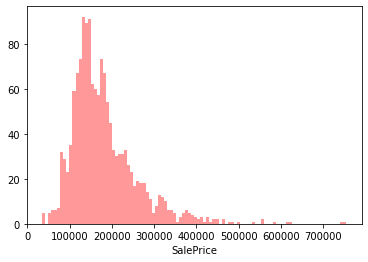

In [3510]:
#Plot shows it is right skewed with outliers
sns.distplot(data['SalePrice'], kde=False, color='red', bins=100)

In [3511]:
#Converting to log to handle the outliers
data['logSalePrice'] = np.log10(data['SalePrice'])

In [3512]:
#Checking
data['logSalePrice']

0       5.319106
1       5.258877
2       5.349278
3       5.146128
4       5.397940
5       5.155336
6       5.487138
7       5.301030
8       5.113609
9       5.071882
10      5.112270
11      5.537819
12      5.158362
13      5.446382
14      5.195900
15      5.120574
16      5.173186
17      4.954243
18      5.201397
19      5.143015
20      5.512284
21      5.144263
22      5.361728
23      5.113609
24      5.187521
25      5.408749
26      5.129690
27      5.485721
28      5.317018
29      4.835691
          ...   
1430    5.283618
1431    5.157608
1432    4.809560
1433    5.270679
1434    5.204120
1435    5.240549
1436    5.080987
1437    5.596176
1438    5.175222
1439    5.294466
1440    5.281033
1441    5.174060
1442    5.491362
1443    5.082785
1444    5.254306
1445    5.110590
1446    5.198382
1447    5.380211
1448    5.049218
1449    4.963788
1450    5.133539
1451    5.458018
1452    5.161368
1453    4.926857
1454    5.267172
1455    5.243038
1456    5.322219
1457    5.4256

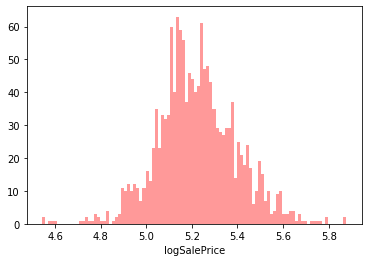

In [3513]:
#Checking plot to see it appears bell shaped now
sns.distplot(data['logSalePrice'], kde=False, color='red', bins=100)

In [3514]:
#Changing year variables to age
data['AgeofHousesinceBuilt'] = data['YrSold'] - data['YearBuilt']

In [3515]:
#Changing year variables to age

data['AgeofRemodelledHouseatSale'] = data['YrSold'] - data['YearRemodAdd']
data['TimeforRemodelsinceBuilt'] = data['YearRemodAdd'] - data['YearBuilt']

In [3516]:
#Changing year variables to age

data['AgeofGaragesinceBuilt'] = data['GarageYrBlt'] - data['YearBuilt'] 
data['AgeofGaragesinceRemodel'] = data['GarageYrBlt'] - data['YearRemodAdd'] 
data['AgeofGarageatSale'] = data['YrSold'] - data['GarageYrBlt'] 

In [3517]:
#Dropping the year columns as they are no longer needed. Also dropping month sold as it is not needed and SalePrice at it is now transformed
data.drop(columns = ['SalePrice','GarageYrBlt', 'YearRemodAdd', 'YearBuilt', 'MoSold', 'YrSold'], axis = 1, inplace = True)

In [3518]:
#Checking

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,logSalePrice,AgeofHousesinceBuilt,AgeofRemodelledHouseatSale,TimeforRemodelsinceBuilt,AgeofGaragesinceBuilt,AgeofGaragesinceRemodel,AgeofGarageatSale
0,1,60,RL,65,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,No,GLQ,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,RFn,2,548,Y,0,61,0,0,0,0,0,WD,Normal,5.319106,5,5,0,0.0,0.0,5.0
1,2,20,RL,80,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,Y,298,0,0,0,0,0,0,WD,Normal,5.258877,31,31,0,0.0,0.0,31.0
2,3,60,RL,68,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,Mn,GLQ,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,Y,0,42,0,0,0,0,0,WD,Normal,5.349278,7,6,1,0.0,-1.0,7.0
3,4,70,RL,60,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,No,ALQ,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,Y,0,35,272,0,0,0,0,WD,Abnorml,5.146128,91,36,55,83.0,28.0,8.0
4,5,60,RL,84,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,Av,GLQ,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,Y,192,84,0,0,0,0,0,WD,Normal,5.397940,8,8,0,0.0,0.0,8.0


In [3519]:
#Checking

data.nunique().sort_values()

CentralAir                       2
Street                           2
Utilities                        2
PavedDrive                       3
BsmtHalfBath                     3
HalfBath                         3
LandSlope                        3
MasVnrType                       4
GarageFinish                     4
BsmtFullBath                     4
ExterQual                        4
FullBath                         4
LandContour                      4
LotShape                         4
KitchenAbvGr                     4
KitchenQual                      4
Fireplaces                       4
BldgType                         5
GarageCars                       5
MSZoning                         5
HeatingQC                        5
BsmtExposure                     5
BsmtQual                         5
LotConfig                        5
ExterCond                        5
Heating                          6
Foundation                       6
SaleCondition                    6
FireplaceQu         

In [3520]:
#Checking

data['CentralAir'].value_counts(normalize=True)

Y    0.934932
N    0.065068
Name: CentralAir, dtype: float64

In [3521]:
#Dropping as value distribution is skewed (>=80%)
data.drop(columns = ['CentralAir'], axis = 1, inplace = True)

In [3522]:
#Checking

data.nunique().sort_values()

Street                           2
Utilities                        2
PavedDrive                       3
HalfBath                         3
BsmtHalfBath                     3
LandSlope                        3
FullBath                         4
GarageFinish                     4
BsmtFullBath                     4
MasVnrType                       4
LandContour                      4
LotShape                         4
KitchenAbvGr                     4
KitchenQual                      4
Fireplaces                       4
ExterQual                        4
GarageCars                       5
BsmtExposure                     5
BsmtQual                         5
HeatingQC                        5
ExterCond                        5
MSZoning                         5
LotConfig                        5
BldgType                         5
SaleCondition                    6
RoofStyle                        6
FireplaceQu                      6
Foundation                       6
Heating             

In [3523]:
#Checking

data['Street'].value_counts(normalize=True)

Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64

In [3524]:
#Dropping as value distribution is skewed (>=80%)
data.drop(columns = ['Street'], axis = 1, inplace = True)

In [3525]:
#Checking

data['Utilities'].value_counts(normalize=True)

AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64

In [3526]:
#Dropping as value distribution is skewed (>=80%)
data.drop(columns = ['Utilities'], axis = 1, inplace = True)

In [3527]:
#Checking

data['PavedDrive'].value_counts(normalize=True)

Y    0.917808
N    0.061644
P    0.020548
Name: PavedDrive, dtype: float64

In [3528]:
#Dropping as value distribution is skewed (>=80%)
data.drop(columns = ['PavedDrive'], axis = 1, inplace = True)

In [3529]:
#Checking

data['BsmtHalfBath'].value_counts(normalize=True)

0    0.943836
1    0.054795
2    0.001370
Name: BsmtHalfBath, dtype: float64

In [3530]:
#Dropping as value distribution is skewed (>=80%)
data.drop(columns = ['BsmtHalfBath'], axis = 1, inplace = True)

In [3531]:
#Checking

data['LandSlope'].value_counts(normalize=True)

Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlope, dtype: float64

In [3532]:
#Dropping as value distribution is skewed (>=80%)
data.drop(columns = ['LandSlope'], axis = 1, inplace = True)

In [3533]:
#Checking

data['FullBath'].value_counts(normalize=True)

2    0.526027
1    0.445205
3    0.022603
0    0.006164
Name: FullBath, dtype: float64

In [3534]:
#Checking

data['GarageFinish'].value_counts(normalize=True)

Unf          0.414384
RFn          0.289041
Fin          0.241096
No Garage    0.055479
Name: GarageFinish, dtype: float64

In [3535]:
#Checking

data['LandContour'].value_counts(normalize=True)

Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64

In [3536]:
#Dropping as value distribution is skewed (>=80%)
data.drop(columns = ['LandContour'], axis = 1, inplace = True)

In [3537]:
#Checking

data['KitchenAbvGr'].value_counts(normalize=True)

1    0.953425
2    0.044521
3    0.001370
0    0.000685
Name: KitchenAbvGr, dtype: float64

In [3538]:
#Dropping as value distribution is skewed (>=80%)
data.drop(columns = ['KitchenAbvGr'], axis = 1, inplace = True)

In [3539]:
#Checking

data['KitchenQual'].value_counts(normalize=True)

TA    0.503425
Gd    0.401370
Ex    0.068493
Fa    0.026712
Name: KitchenQual, dtype: float64

In [3540]:
#Checking

data['ExterQual'].value_counts(normalize=True)

TA    0.620548
Gd    0.334247
Ex    0.035616
Fa    0.009589
Name: ExterQual, dtype: float64

In [3541]:
#Checking

data['ExterCond'].value_counts(normalize=True)

TA    0.878082
Gd    0.100000
Fa    0.019178
Ex    0.002055
Po    0.000685
Name: ExterCond, dtype: float64

In [3542]:
#Dropping as value distribution is skewed (>=80%)
data.drop(columns = ['ExterCond'], axis = 1, inplace = True)

In [3543]:
#Checking

data['BsmtQual'].value_counts(normalize=True)

TA             0.444521
Gd             0.423288
Ex             0.082877
No Basement    0.025342
Fa             0.023973
Name: BsmtQual, dtype: float64

In [3544]:
#Checking

data['BldgType'].value_counts(normalize=True)

1Fam      0.835616
TwnhsE    0.078082
Duplex    0.035616
Twnhs     0.029452
2fmCon    0.021233
Name: BldgType, dtype: float64

In [3545]:
#Dropping as value distribution is skewed (>=80%)
data.drop(columns = ['BldgType'], axis = 1, inplace = True)

In [3546]:
#Checking

data['LotConfig'].value_counts(normalize=True)

Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64

In [3547]:
#Checking

data['MSZoning'].value_counts(normalize=True)

RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64

In [3548]:
#Checking

data['HeatingQC'].value_counts(normalize=True)

Ex    0.507534
TA    0.293151
Gd    0.165068
Fa    0.033562
Po    0.000685
Name: HeatingQC, dtype: float64

In [3549]:
#Checking

data['SaleCondition'].value_counts(normalize=True)

Normal     0.820548
Partial    0.085616
Abnorml    0.069178
Family     0.013699
Alloca     0.008219
AdjLand    0.002740
Name: SaleCondition, dtype: float64

In [3550]:
#Dropping as value distribution is skewed (>=80%)
data.drop(columns = ['SaleCondition'], axis = 1, inplace = True)

In [3551]:
#Checking

data['Heating'].value_counts(normalize=True)

GasA     0.978082
GasW     0.012329
Grav     0.004795
Wall     0.002740
OthW     0.001370
Floor    0.000685
Name: Heating, dtype: float64

In [3552]:
#Dropping as value distribution is skewed (>=80%)
data.drop(columns = ['Heating'], axis = 1, inplace = True)

In [3553]:
#Checking

data['Foundation'].value_counts(normalize=True)

PConc     0.443151
CBlock    0.434247
BrkTil    0.100000
Slab      0.016438
Stone     0.004110
Wood      0.002055
Name: Foundation, dtype: float64

In [3554]:
#Checking

data['FireplaceQu'].value_counts(normalize=True)

No Fireplace    0.472603
Gd              0.260274
TA              0.214384
Fa              0.022603
Ex              0.016438
Po              0.013699
Name: FireplaceQu, dtype: float64

In [3555]:
#Checking

data['RoofStyle'].value_counts(normalize=True)

Gable      0.781507
Hip        0.195890
Flat       0.008904
Gambrel    0.007534
Mansard    0.004795
Shed       0.001370
Name: RoofStyle, dtype: float64

In [3556]:
#Checking

data['BsmtFinType1'].value_counts(normalize=True)

Unf            0.294521
GLQ            0.286301
ALQ            0.150685
BLQ            0.101370
Rec            0.091096
LwQ            0.050685
No Basement    0.025342
Name: BsmtFinType1, dtype: float64

In [3557]:
#Checking

data['Functional'].value_counts(normalize=True)

Typ     0.931507
Min2    0.023288
Min1    0.021233
Mod     0.010274
Maj1    0.009589
Maj2    0.003425
Sev     0.000685
Name: Functional, dtype: float64

In [3558]:
#Dropping as value distribution is skewed (>=80%)
data.drop(columns = ['Functional'], axis = 1, inplace = True)

In [3559]:
#Checking

data['GarageType'].value_counts(normalize=True)

Attchd       0.595890
Detchd       0.265068
BuiltIn      0.060274
No Garage    0.055479
Basment      0.013014
CarPort      0.006164
2Types       0.004110
Name: GarageType, dtype: float64

In [3560]:
#Checking

data['RoofMatl'].value_counts(normalize=True)

CompShg    0.982192
Tar&Grv    0.007534
WdShngl    0.004110
WdShake    0.003425
Membran    0.000685
ClyTile    0.000685
Roll       0.000685
Metal      0.000685
Name: RoofMatl, dtype: float64

In [3561]:
#Dropping as value distribution is skewed (>=80%)
data.drop(columns = ['RoofMatl'], axis = 1, inplace = True)

In [3562]:
data['PoolArea'].value_counts(normalize=True) #Skewed, but not a categorical variable, so not dropping

0      0.995205
738    0.000685
648    0.000685
576    0.000685
555    0.000685
519    0.000685
512    0.000685
480    0.000685
Name: PoolArea, dtype: float64

In [3563]:
#Checking

data.nunique().sort_values()

HalfBath                         3
Fireplaces                       4
KitchenQual                      4
FullBath                         4
LotShape                         4
BsmtFullBath                     4
GarageFinish                     4
ExterQual                        4
MasVnrType                       4
MSZoning                         5
LotConfig                        5
HeatingQC                        5
BsmtExposure                     5
BsmtQual                         5
GarageCars                       5
FireplaceQu                      6
Foundation                       6
RoofStyle                        6
BsmtFinType1                     7
GarageType                       7
Condition2                       8
HouseStyle                       8
BedroomAbvGr                     8
PoolArea                         8
OverallCond                      9
SaleType                         9
Condition1                       9
OverallQual                     10
TotRmsAbvGrd        

In [3564]:
#Checking

data['OverallCond'].value_counts(normalize=True)

5    0.562329
6    0.172603
7    0.140411
8    0.049315
4    0.039041
3    0.017123
9    0.015068
2    0.003425
1    0.000685
Name: OverallCond, dtype: float64

In [3565]:
#Checking

data['SaleType'].value_counts(normalize=True)

WD       0.867808
New      0.083562
COD      0.029452
ConLD    0.006164
ConLw    0.003425
ConLI    0.003425
CWD      0.002740
Oth      0.002055
Con      0.001370
Name: SaleType, dtype: float64

In [3566]:
#Dropping as value distribution is skewed (>=80%)
data.drop(columns = ['SaleType'], axis = 1, inplace = True)

In [3567]:
data['Condition1'].value_counts(normalize=True)

Norm      0.863014
Feedr     0.055479
Artery    0.032877
RRAn      0.017808
PosN      0.013014
RRAe      0.007534
PosA      0.005479
RRNn      0.003425
RRNe      0.001370
Name: Condition1, dtype: float64

In [3568]:
#Dropping as value distribution is skewed (>=80%)
data.drop(columns = ['Condition1'], axis = 1, inplace = True)

In [3569]:
#Checking
data['OverallQual'].value_counts(normalize=True)

5     0.271918
6     0.256164
7     0.218493
8     0.115068
4     0.079452
9     0.029452
3     0.013699
10    0.012329
2     0.002055
1     0.001370
Name: OverallQual, dtype: float64

In [3570]:
#Checking
data['TotRmsAbvGrd'].value_counts(normalize=True)

6     0.275342
7     0.225342
5     0.188356
8     0.128082
4     0.066438
9     0.051370
10    0.032192
11    0.012329
3     0.011644
12    0.007534
14    0.000685
2     0.000685
Name: TotRmsAbvGrd, dtype: float64

In [3571]:
#Checking
data['MSSubClass'].value_counts(normalize=True)

20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64

In [3572]:
#Checking
data['Exterior1st'].value_counts(normalize=True)

VinylSd    0.352740
HdBoard    0.152055
MetalSd    0.150685
Wd Sdng    0.141096
Plywood    0.073973
CemntBd    0.041781
BrkFace    0.034247
WdShing    0.017808
Stucco     0.017123
AsbShng    0.013699
BrkComm    0.001370
Stone      0.001370
CBlock     0.000685
ImStucc    0.000685
AsphShn    0.000685
Name: Exterior1st, dtype: float64

In [3573]:
#Checking
data['Exterior2nd'].value_counts(normalize=True)

VinylSd    0.345205
MetalSd    0.146575
HdBoard    0.141781
Wd Sdng    0.134932
Plywood    0.097260
CmentBd    0.041096
Wd Shng    0.026027
Stucco     0.017808
BrkFace    0.017123
AsbShng    0.013699
ImStucc    0.006849
Brk Cmn    0.004795
Stone      0.003425
AsphShn    0.002055
CBlock     0.000685
Other      0.000685
Name: Exterior2nd, dtype: float64

In [3574]:
data['3SsnPorch'].value_counts(normalize=True) #Skewed, but a numeric data type

0      0.983562
168    0.002055
216    0.001370
144    0.001370
180    0.001370
245    0.000685
238    0.000685
290    0.000685
196    0.000685
182    0.000685
407    0.000685
304    0.000685
162    0.000685
153    0.000685
320    0.000685
140    0.000685
130    0.000685
96     0.000685
23     0.000685
508    0.000685
Name: 3SsnPorch, dtype: float64

In [3575]:
data['MiscVal'].value_counts(normalize=True) #$Value of miscellaneous feature; skewed, but numeric variable.

0        0.964384
400      0.007534
500      0.005479
700      0.003425
450      0.002740
2000     0.002740
600      0.002740
1200     0.001370
480      0.001370
1150     0.000685
800      0.000685
15500    0.000685
620      0.000685
3500     0.000685
560      0.000685
2500     0.000685
1300     0.000685
1400     0.000685
350      0.000685
8300     0.000685
54       0.000685
Name: MiscVal, dtype: float64

In [3576]:
data['Neighborhood'].value_counts(normalize=True) #Appears with a high number of text string values

NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.033562
NoRidge    0.028082
Timber     0.026027
IDOTRR     0.025342
ClearCr    0.019178
StoneBr    0.017123
SWISU      0.017123
Blmngtn    0.011644
MeadowV    0.011644
BrDale     0.010959
Veenker    0.007534
NPkVill    0.006164
Blueste    0.001370
Name: Neighborhood, dtype: float64

In [3577]:
#Checking
data.nunique().sort_values()

HalfBath                         3
GarageFinish                     4
FullBath                         4
LotShape                         4
BsmtFullBath                     4
KitchenQual                      4
ExterQual                        4
Fireplaces                       4
MasVnrType                       4
MSZoning                         5
LotConfig                        5
BsmtExposure                     5
BsmtQual                         5
HeatingQC                        5
GarageCars                       5
Foundation                       6
RoofStyle                        6
FireplaceQu                      6
BsmtFinType1                     7
GarageType                       7
HouseStyle                       8
Condition2                       8
BedroomAbvGr                     8
PoolArea                         8
OverallCond                      9
OverallQual                     10
TotRmsAbvGrd                    12
Exterior1st                     15
MSSubClass          

List of categorical variables to be dummified: GarageFinish, LotShape, KitchenQual, ExterQual, MasVnrType, MSZoning,
LotConfig, BsmtExposure, BsmtQual, HeatingQC, Foundation, RoofStyle,  FireplaceQu,  BsmtFinType1, GarageType,HouseStyle,
Condition2,OverallCond,OverallQual,Exterior1st,MSSubClass,Exterior2nd, Neighborhood                  


In [3578]:
#Changing value names
data['GarageFinish']= data['GarageFinish'].replace('Fin', 'FinGarageFinish')
data['GarageFinish']= data['GarageFinish'].replace('RFn', 'RFnGarageFinish')
data['GarageFinish']= data['GarageFinish'].replace('Unf', 'UnfGarageFinish')
data['GarageFinish']= data['GarageFinish'].replace('No Garage', 'NoGarageGarageFinish')

In [3579]:
#Checking
data['GarageFinish'].value_counts()

UnfGarageFinish         605
RFnGarageFinish         422
FinGarageFinish         352
NoGarageGarageFinish     81
Name: GarageFinish, dtype: int64

In [3580]:
#Changing value names
data['LotShape']= data['LotShape'].replace('Reg', 'RegularLotShape')
data['LotShape']= data['LotShape'].replace('IR1', 'SlightlyirregularLotShape')
data['LotShape']= data['LotShape'].replace('IR2', 'ModeratelyirregularLotShape')
data['LotShape']= data['LotShape'].replace('IR3', 'IrregularLotShape')

In [3581]:
#Checking
data['LotShape'].value_counts()

RegularLotShape                925
SlightlyirregularLotShape      484
ModeratelyirregularLotShape     41
IrregularLotShape               10
Name: LotShape, dtype: int64

In [3582]:
#Changing value names
data['KitchenQual']= data['KitchenQual'].replace('Ex', 'Excellentkitchenquality')
data['KitchenQual']= data['KitchenQual'].replace('Gd', 'Goodkitchenquality')
data['KitchenQual']= data['KitchenQual'].replace('TA', 'TypicalAveragekitchenquality')
data['KitchenQual']= data['KitchenQual'].replace('Fa', 'Fairkitchenquality')
data['KitchenQual']= data['KitchenQual'].replace('Po', 'Poorkitchenquality')


In [3583]:
#Checking
data['KitchenQual'].value_counts()

TypicalAveragekitchenquality    735
Goodkitchenquality              586
Excellentkitchenquality         100
Fairkitchenquality               39
Name: KitchenQual, dtype: int64

In [3584]:
#Changing value names
data['ExterQual']= data['ExterQual'].replace('Ex', 'Excellentexteriormaterialquality')
data['ExterQual']= data['ExterQual'].replace('Gd', 'Goodexteriormaterialquality')
data['ExterQual']= data['ExterQual'].replace('TA', 'Averagetypicalexteriormaterialquality')
data['ExterQual']= data['ExterQual'].replace('Fa', 'Fairexteriormaterialquality')
data['ExterQual']= data['ExterQual'].replace('Po', 'Poorexteriormaterialquality')

In [3585]:
#Changing value names
data['MasVnrType']= data['MasVnrType'].replace('BrkCmn', 'Brickcommonmasonryveneertype')
data['MasVnrType']= data['MasVnrType'].replace('BrkFace', 'Brickfacemasonryveneertype')
data['MasVnrType']= data['MasVnrType'].replace('CBlock', 'Cinderblockmasonryveneertype')
data['MasVnrType']= data['MasVnrType'].replace('None', 'Nomasonryveneertype')
data['MasVnrType']= data['MasVnrType'].replace('Stone', 'Stonemasonryveneertype')


In [3586]:
#Changing value names
data['MSZoning']= data['MSZoning'].replace('A', 'Agriculturezoningclassification')
data['MSZoning']= data['MSZoning'].replace('C', 'Commercialzoningclassification')
data['MSZoning']= data['MSZoning'].replace('FV', 'Floatingvillageresidentialzoningclassification')
data['MSZoning']= data['MSZoning'].replace('I', 'Industrialzoningclassification')
data['MSZoning']= data['MSZoning'].replace('RH', 'Residentialhighdensityzoningclassification')
data['MSZoning']= data['MSZoning'].replace('RL', 'Residentiallowdensityzoningclassification')
data['MSZoning']= data['MSZoning'].replace('RP', 'Residentiallowdensityparkzoningclassification')
data['MSZoning']= data['MSZoning'].replace('RM', 'Residentialmediumdensityzoningclassification')


In [3587]:
#Changing value names
data['LotConfig']= data['LotConfig'].replace('Inside', 'Lotconfiginside')
data['LotConfig']= data['LotConfig'].replace('Corner', 'Lotconfigcorner')
data['LotConfig']= data['LotConfig'].replace('CulDSac', 'Lotconfigculdesac')
data['LotConfig']= data['LotConfig'].replace('FR2', 'Lotconfigfrontage2sides')
data['LotConfig']= data['LotConfig'].replace('FR3', 'Lotconfigfrontage3sides')


In [3588]:
#Changing value names
data['BsmtExposure']= data['BsmtExposure'].replace('Gd', 'GoodBsmtExposure')
data['BsmtExposure']= data['BsmtExposure'].replace('Av', 'AverageBsmtExposure')
data['BsmtExposure']= data['BsmtExposure'].replace('Mn', 'MinimumBsmtExposure')
data['BsmtExposure']= data['BsmtExposure'].replace('No', 'NoBsmtExposure')
data['BsmtExposure']= data['BsmtExposure'].replace('No Basement', 'NoBasementBsmtExposure')


In [3589]:
#Changing value names
data['BsmtQual']= data['BsmtQual'].replace('Ex', 'ExcellentBsmtQual')
data['BsmtQual']= data['BsmtQual'].replace('Gd', 'GoodBsmtQual')
data['BsmtQual']= data['BsmtQual'].replace('TA', 'TypicalBsmtQual')
data['BsmtQual']= data['BsmtQual'].replace('Fa', 'FairBsmtQual')
data['BsmtQual']= data['BsmtQual'].replace('Po', 'PoorBsmtQual')
data['BsmtQual']= data['BsmtQual'].replace('No Basement', 'NoBasementBsmtQual')


In [3590]:
#Changing value names
data['HeatingQC']= data['HeatingQC'].replace('Ex', 'ExcellentHeatingQC')
data['HeatingQC']= data['HeatingQC'].replace('Gd', 'GoodHeatingQC')
data['HeatingQC']= data['HeatingQC'].replace('TA', 'TypicalaverageHeatingQC')
data['HeatingQC']= data['HeatingQC'].replace('Fa', 'FairHeatingQC')
data['HeatingQC']= data['HeatingQC'].replace('Po', 'PoorHeatingQC')


In [3591]:
#Changing value names
data['Foundation']= data['Foundation'].replace('BrkTil', 'BrickandtileFoundation')
data['Foundation']= data['Foundation'].replace('CBlock', 'CinderblockFoundation')
data['Foundation']= data['Foundation'].replace('PConc', 'PouredconcreteFoundation')
data['Foundation']= data['Foundation'].replace('Slab', 'SlabFoundation')
data['Foundation']= data['Foundation'].replace('Stone', 'StoneFoundation')
data['Foundation']= data['Foundation'].replace('Wood', 'WoodFoundation')


In [3592]:
#Changing value names
data['RoofStyle']= data['RoofStyle'].replace('Flat', 'FlatRoofStyle')
data['RoofStyle']= data['RoofStyle'].replace('Gable', 'GableRoofStyle')
data['RoofStyle']= data['RoofStyle'].replace('Gambrel', 'GambrelRoofStyle')
data['RoofStyle']= data['RoofStyle'].replace('Hip', 'HipRoofStyle')
data['RoofStyle']= data['RoofStyle'].replace('Mansard', 'MansardRoofStyle')
data['RoofStyle']= data['RoofStyle'].replace('Shed', 'ShedRoofStyle')


In [3593]:
#Changing value names
data['FireplaceQu']= data['FireplaceQu'].replace('Ex', 'ExcellentFireplaceQu')
data['FireplaceQu']= data['FireplaceQu'].replace('Gd', 'GoodFireplaceQu')
data['FireplaceQu']= data['FireplaceQu'].replace('TA', 'TypicalaverageFireplaceQu')
data['FireplaceQu']= data['FireplaceQu'].replace('Fa', 'FairFireplaceQu')
data['FireplaceQu']= data['FireplaceQu'].replace('Po', 'PoorFireplaceQu')
data['FireplaceQu']= data['FireplaceQu'].replace('No Fireplace', 'NoFireplaceFireplaceQu')


In [3594]:
#Changing value names
data['BsmtFinType1']= data['BsmtFinType1'].replace('GLQ', 'GoodlivingquartersBsmtFinType1')
data['BsmtFinType1']= data['BsmtFinType1'].replace('ALQ', 'AveragelivingquartersBsmtFinType1')
data['BsmtFinType1']= data['BsmtFinType1'].replace('BLQ', 'BelowaveragelivingquartersBsmtFinType1')
data['BsmtFinType1']= data['BsmtFinType1'].replace('Rec', 'AveragerecroomBsmtFinType1')
data['BsmtFinType1']= data['BsmtFinType1'].replace('LwQ', 'LowqualityBsmtFinType1')
data['BsmtFinType1']= data['BsmtFinType1'].replace('Unf', 'UnfinishedBsmtFinType1')
data['BsmtFinType1']= data['BsmtFinType1'].replace('No Basement', 'NoBasementBsmtFinType1')


In [3595]:
#Changing value names
data['GarageType']= data['GarageType'].replace('2Types', '2TypesGarageType')
data['GarageType']= data['GarageType'].replace('Attchd', 'AttachedGarageType')
data['GarageType']= data['GarageType'].replace('Basment', 'BasementGarageType')
data['GarageType']= data['GarageType'].replace('BuiltIn', 'BuiltinGarageType')
data['GarageType']= data['GarageType'].replace('Carport', 'CarPortGarageType')
data['GarageType']= data['GarageType'].replace('Detchd', 'DetachedGarageType')
data['GarageType']= data['GarageType'].replace('No Garage', 'NoGarageGarageType')


In [3596]:
#Changing value names
data['HouseStyle']= data['HouseStyle'].replace('1Story', 'OneStoryHouseStyle')
data['HouseStyle']= data['HouseStyle'].replace('1.5Fin', '1.5FinHouseStyle')
data['HouseStyle']= data['HouseStyle'].replace('1.5Unf', '1.5UnfHouseStyle')
data['HouseStyle']= data['HouseStyle'].replace('2Story', '2StoryHouseStyle')
data['HouseStyle']= data['HouseStyle'].replace('2.5Fin', '2.5FinHouseStyle')
data['HouseStyle']= data['HouseStyle'].replace('2.5Unf', '2.5UnfHouseStyle')
data['HouseStyle']= data['HouseStyle'].replace('SFoyer', 'SplitFoyerHouseStyle')
data['HouseStyle']= data['HouseStyle'].replace('SLvl', 'SplitLevelHouseStyle')


In [3597]:
#Changing value names
data['Condition2']= data['Condition2'].replace('Artery', 'ArteryProximityCondition2')
data['Condition2']= data['Condition2'].replace('Feedr', 'FeederProximityCondition2')
data['Condition2']= data['Condition2'].replace('Norm', 'NormalProximityCondition2')
data['Condition2']= data['Condition2'].replace('RRNn', 'RRNnProximityCondition2')
data['Condition2']= data['Condition2'].replace('RRAn', 'RRAnProximityCondition2')
data['Condition2']= data['Condition2'].replace('PosN', 'PosNProximityCondition2')
data['Condition2']= data['Condition2'].replace('PosA', 'PosAProximityCondition2')
data['Condition2']= data['Condition2'].replace('RRNe', 'RRNeProximityCondition2')
data['Condition2']= data['Condition2'].replace('RRAe', 'RRAeProximityCondition2')


In [3598]:
#Changing value names
data['OverallCond']= data['OverallCond'].replace(10, 'VeryExcellentOverallCond')
data['OverallCond']= data['OverallCond'].replace(9, 'ExcellentOverallCond')
data['OverallCond']= data['OverallCond'].replace(8, 'VeryGoodOverallCond')
data['OverallCond']= data['OverallCond'].replace(7, 'GoodOverallCond')
data['OverallCond']= data['OverallCond'].replace(6, 'AboveAverageOverallCond')
data['OverallCond']= data['OverallCond'].replace(5, 'AverageOverallCond')
data['OverallCond']= data['OverallCond'].replace(4, 'BelowAverageOverallCond')
data['OverallCond']= data['OverallCond'].replace(3, 'FairOverallCond')
data['OverallCond']= data['OverallCond'].replace(2, 'PoorOverallCond')
data['OverallCond']= data['OverallCond'].replace(1, 'VeryPoorOverallCond')


In [3599]:
#Checking
data['OverallCond'].value_counts()

AverageOverallCond         821
AboveAverageOverallCond    252
GoodOverallCond            205
VeryGoodOverallCond         72
BelowAverageOverallCond     57
FairOverallCond             25
ExcellentOverallCond        22
PoorOverallCond              5
VeryPoorOverallCond          1
Name: OverallCond, dtype: int64

In [3600]:
#Changing value names
data['OverallQual']= data['OverallQual'].replace(10, 'VeryExcellentOverallQual')
data['OverallQual']= data['OverallQual'].replace(9, 'ExcellentOverallQual')
data['OverallQual']= data['OverallQual'].replace(8, 'VeryGoodOverallQual')
data['OverallQual']= data['OverallQual'].replace(7, 'GoodOverallQual')
data['OverallQual']= data['OverallQual'].replace(6, 'AboveAverageOverallQual')
data['OverallQual']= data['OverallQual'].replace(5, 'AverageOverallQual')
data['OverallQual']= data['OverallQual'].replace(4, 'BelowAverageOverallQual')
data['OverallQual']= data['OverallQual'].replace(3, 'FairOverallQual')
data['OverallQual']= data['OverallQual'].replace(2, 'PoorOverallQual')
data['OverallQual']= data['OverallQual'].replace(1, 'VeryPoorOverallQual')


In [3601]:
#Changing value names
data['Exterior1st']= data['Exterior1st'].replace('AsbShng', 'AsbShngExterior1st')
data['Exterior1st']= data['Exterior1st'].replace('AsphShn', 'AsphShnExterior1st')
data['Exterior1st']= data['Exterior1st'].replace('BrkComm', 'BrkCommExterior1st')
data['Exterior1st']= data['Exterior1st'].replace('BrkFace', 'BrkFaceExterior1st')
data['Exterior1st']= data['Exterior1st'].replace('CBlock', 'CBlockExterior1st')
data['Exterior1st']= data['Exterior1st'].replace('CemntBd', 'CemntBdExterior1st')
data['Exterior1st']= data['Exterior1st'].replace('HdBoard', 'HdBoardExterior1st')
data['Exterior1st']= data['Exterior1st'].replace('ImStucc', 'ImStuccExterior1st')
data['Exterior1st']= data['Exterior1st'].replace('MetalSd', 'MetalSdExterior1st')
data['Exterior1st']= data['Exterior1st'].replace('Other', 'OtherExterior1st')
data['Exterior1st']= data['Exterior1st'].replace('Plywood', 'PlywoodExterior1st')
data['Exterior1st']= data['Exterior1st'].replace('PreCast', 'PreCastExterior1st')
data['Exterior1st']= data['Exterior1st'].replace('Stone', 'StoneExterior1st')
data['Exterior1st']= data['Exterior1st'].replace('Stucco', 'StuccoExterior1st')
data['Exterior1st']= data['Exterior1st'].replace('VinylSd', 'VinylSdExterior1st')
data['Exterior1st']= data['Exterior1st'].replace('Wd Sdng', 'WdSdngExterior1st')
data['Exterior1st']= data['Exterior1st'].replace('WdShing', 'WdShingExterior1st')


In [3602]:
#Checking
data['Exterior1st'].value_counts()

VinylSdExterior1st    515
HdBoardExterior1st    222
MetalSdExterior1st    220
WdSdngExterior1st     206
PlywoodExterior1st    108
CemntBdExterior1st     61
BrkFaceExterior1st     50
WdShingExterior1st     26
StuccoExterior1st      25
AsbShngExterior1st     20
BrkCommExterior1st      2
StoneExterior1st        2
AsphShnExterior1st      1
CBlockExterior1st       1
ImStuccExterior1st      1
Name: Exterior1st, dtype: int64

In [3603]:
#Changing value names
data['MSSubClass']= data['MSSubClass'].replace(20, '20MSSubClass')
data['MSSubClass']= data['MSSubClass'].replace(30, '30MSSubClass')
data['MSSubClass']= data['MSSubClass'].replace(40, '40MSSubClass')
data['MSSubClass']= data['MSSubClass'].replace(45, '45MSSubClass')
data['MSSubClass']= data['MSSubClass'].replace(50, '50MSSubClass')
data['MSSubClass']= data['MSSubClass'].replace(60, '60MSSubClass')
data['MSSubClass']= data['MSSubClass'].replace(70, '70MSSubClass')
data['MSSubClass']= data['MSSubClass'].replace(75, '75MSSubClass')
data['MSSubClass']= data['MSSubClass'].replace(80, '80MSSubClass')
data['MSSubClass']= data['MSSubClass'].replace(85, '85MSSubClass')
data['MSSubClass']= data['MSSubClass'].replace(90, '90MSSubClass')
data['MSSubClass']= data['MSSubClass'].replace(120, '120MSSubClass')
data['MSSubClass']= data['MSSubClass'].replace(150, '150MSSubClass')
data['MSSubClass']= data['MSSubClass'].replace(160, '160MSSubClass')
data['MSSubClass']= data['MSSubClass'].replace(180, '180MSSubClass')
data['MSSubClass']= data['MSSubClass'].replace(190, '190MSSubClass')


In [3604]:
#Checking
data['MSSubClass'].value_counts()

20MSSubClass     536
60MSSubClass     299
50MSSubClass     144
120MSSubClass     87
30MSSubClass      69
160MSSubClass     63
70MSSubClass      60
80MSSubClass      58
90MSSubClass      52
190MSSubClass     30
85MSSubClass      20
75MSSubClass      16
45MSSubClass      12
180MSSubClass     10
40MSSubClass       4
Name: MSSubClass, dtype: int64

In [3605]:
#Changing value names
data['Exterior2nd']= data['Exterior2nd'].replace('AsbShng', 'AsbShngExterior2nd')
data['Exterior2nd']= data['Exterior2nd'].replace('AsphShn', 'AsphShnExterior2nd')
data['Exterior2nd']= data['Exterior2nd'].replace('BrkComm', 'BrkCommExterior2nd')
data['Exterior2nd']= data['Exterior2nd'].replace('BrkFace', 'BrkFaceExterior2nd')
data['Exterior2nd']= data['Exterior2nd'].replace('CBlock', 'CBlockExterior2nd')
data['Exterior2nd']= data['Exterior2nd'].replace('CemntBd', 'CemntBdExterior2nd')
data['Exterior2nd']= data['Exterior2nd'].replace('HdBoard', 'HdBoardExterior2nd')
data['Exterior2nd']= data['Exterior2nd'].replace('ImStucc', 'ImStuccExterior2nd')
data['Exterior2nd']= data['Exterior2nd'].replace('MetalSd', 'MetalSdExterior2nd')
data['Exterior2nd']= data['Exterior2nd'].replace('Other', 'OtherExterior2nd')
data['Exterior2nd']= data['Exterior2nd'].replace('Plywood', 'PlywoodExterior2nd')
data['Exterior2nd']= data['Exterior2nd'].replace('PreCast', 'PreCastExterior2nd')
data['Exterior2nd']= data['Exterior2nd'].replace('Stone', 'StoneExterior2nd')
data['Exterior2nd']= data['Exterior2nd'].replace('Stucco', 'StuccoExterior2nd')
data['Exterior2nd']= data['Exterior2nd'].replace('VinylSd', 'VinylSdExterior2nd')
data['Exterior2nd']= data['Exterior2nd'].replace('Wd Sdng', 'WdSdngExterior2nd')
data['Exterior2nd']= data['Exterior2nd'].replace('WdShing', 'WdShingExterior2nd')


In [3606]:
#Checking
data['Exterior2nd'].value_counts()

VinylSdExterior2nd    504
MetalSdExterior2nd    214
HdBoardExterior2nd    207
WdSdngExterior2nd     197
PlywoodExterior2nd    142
CmentBd                60
Wd Shng                38
StuccoExterior2nd      26
BrkFaceExterior2nd     25
AsbShngExterior2nd     20
ImStuccExterior2nd     10
Brk Cmn                 7
StoneExterior2nd        5
AsphShnExterior2nd      3
OtherExterior2nd        1
CBlockExterior2nd       1
Name: Exterior2nd, dtype: int64

In [3607]:
#Changing value names
data['Neighborhood']= data['Neighborhood'].replace('Blmngtn', 'BlmngtnNeighborhood')
data['Neighborhood']= data['Neighborhood'].replace('Blueste', 'BluesteNeighborhood')
data['Neighborhood']= data['Neighborhood'].replace('BrDale', 'BrDaleNeighborhood')
data['Neighborhood']= data['Neighborhood'].replace('BrkSide', 'BrkSideNeighborhood')
data['Neighborhood']= data['Neighborhood'].replace('ClearCr', 'ClearCrNeighborhood')
data['Neighborhood']= data['Neighborhood'].replace('CollgCr', 'CollgCrNeighborhood')
data['Neighborhood']= data['Neighborhood'].replace('Crawfor', 'CrawforNeighborhood')
data['Neighborhood']= data['Neighborhood'].replace('Edwards', 'EdwardsNeighborhood')
data['Neighborhood']= data['Neighborhood'].replace('Gilbert', 'GilbertNeighborhood')
data['Neighborhood']= data['Neighborhood'].replace('IDOTRR', 'IDOTRRNeighborhood')
data['Neighborhood']= data['Neighborhood'].replace('MeadowV', 'MeadowVNeighborhood')
data['Neighborhood']= data['Neighborhood'].replace('Mitchel', 'MitchelNeighborhood')
data['Neighborhood']= data['Neighborhood'].replace('NAmes', 'NAmesNeighborhood')
data['Neighborhood']= data['Neighborhood'].replace('NoRidge', 'NoRidgeNeighborhood')
data['Neighborhood']= data['Neighborhood'].replace('NPkVill', 'NPkVillNeighborhood')
data['Neighborhood']= data['Neighborhood'].replace('NridgHt', 'NridgHtNeighborhood')
data['Neighborhood']= data['Neighborhood'].replace('NWAmes', 'NWAmesNeighborhood')
data['Neighborhood']= data['Neighborhood'].replace('OldTown', 'OldTownNeighborhood')
data['Neighborhood']= data['Neighborhood'].replace('SWISU', 'SWISUNeighborhood')
data['Neighborhood']= data['Neighborhood'].replace('Sawyer', 'SawyerNeighborhood')
data['Neighborhood']= data['Neighborhood'].replace('SawyerW', 'SawyerWNeighborhood')
data['Neighborhood']= data['Neighborhood'].replace('Somerst', 'SomerstNeighborhood')
data['Neighborhood']= data['Neighborhood'].replace('StoneBr', 'StoneBrNeighborhood')
data['Neighborhood']= data['Neighborhood'].replace('Timber', 'TimberNeighborhood')
data['Neighborhood']= data['Neighborhood'].replace('Veenker', 'VeenkerNeighborhood')


List of categorical variables to be dummified: GarageFinish, LotShape, KitchenQual, ExterQual, MasVnrType, MSZoning,
LotConfig, BsmtExposure, BsmtQual, HeatingQC, Foundation, RoofStyle,  FireplaceQu,  BsmtFinType1, GarageType,HouseStyle,
Condition2,OverallCond,OverallQual,Exterior1st,MSSubClass,Exterior2nd, Neighborhood  

In [3608]:
#Creating dummies, dropping the first column, concatenating into the main dataframe, and then dropping the original variable
dummyGarageFinish = pd.get_dummies(data['GarageFinish'], drop_first = True)
data = pd.concat([data, dummyGarageFinish], axis = 1)
data.drop(['GarageFinish'], axis = 1, inplace = True)

In [3609]:
#Checking
dummyGarageFinish.head()

,NoGarageGarageFinish,RFnGarageFinish,UnfGarageFinish
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0


In [3610]:
#Creating dummies, dropping the first column, concatenating into the main dataframe, and then dropping the original variable
dummyLotShape = pd.get_dummies(data['LotShape'], drop_first = True)
data = pd.concat([data, dummyLotShape], axis = 1)
data.drop(['LotShape'], axis = 1, inplace = True)

In [3611]:
#Checking
dummyLotShape.head()

,ModeratelyirregularLotShape,RegularLotShape,SlightlyirregularLotShape
0,0,1,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1


In [3612]:
#Creating dummies, dropping the first column, concatenating into the main dataframe, and then dropping the original variable

dummyKitchenQual = pd.get_dummies(data['KitchenQual'], drop_first = True)
data = pd.concat([data, dummyKitchenQual], axis = 1)
data.drop(['KitchenQual'], axis = 1, inplace = True)

In [3613]:
#Creating dummies, dropping the first column, concatenating into the main dataframe, and then dropping the original variable

dummyExterQual = pd.get_dummies(data['ExterQual'], drop_first = True)
data = pd.concat([data, dummyExterQual], axis = 1)
data.drop(['ExterQual'], axis = 1, inplace = True)

In [3614]:
#Creating dummies, dropping the first column, concatenating into the main dataframe, and then dropping the original variable

dummyMasVnrType = pd.get_dummies(data['MasVnrType'], drop_first = True)
data = pd.concat([data, dummyMasVnrType], axis = 1)
data.drop(['MasVnrType'], axis = 1, inplace = True)

In [3615]:
#Creating dummies, dropping the first column, concatenating into the main dataframe, and then dropping the original variable

dummyMSZoning = pd.get_dummies(data['MSZoning'], drop_first = True)
data = pd.concat([data, dummyMSZoning], axis = 1)
data.drop(['MSZoning'], axis = 1, inplace = True)

In [3616]:
#Checking
dummyMSZoning.head()

,Floatingvillageresidentialzoningclassification,Residentialhighdensityzoningclassification,Residentiallowdensityzoningclassification,Residentialmediumdensityzoningclassification
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [3617]:
#Creating dummies, dropping the first column, concatenating into the main dataframe, and then dropping the original variable

dummyLotConfig = pd.get_dummies(data['LotConfig'], drop_first = True)
data = pd.concat([data, dummyLotConfig], axis = 1)
data.drop(['LotConfig'], axis = 1, inplace = True)

In [3618]:
#Creating dummies, dropping the first column, concatenating into the main dataframe, and then dropping the original variable

dummyBsmtExposure = pd.get_dummies(data['BsmtExposure'], drop_first = True)
data = pd.concat([data, dummyBsmtExposure], axis = 1)
data.drop(['BsmtExposure'], axis = 1, inplace = True)

In [3619]:
#Creating dummies, dropping the first column, concatenating into the main dataframe, and then dropping the original variable

dummyBsmtQual = pd.get_dummies(data['BsmtQual'], drop_first = True)
data = pd.concat([data, dummyBsmtQual], axis = 1)
data.drop(['BsmtQual'], axis = 1, inplace = True)

In [3620]:
#Creating dummies, dropping the first column, concatenating into the main dataframe, and then dropping the original variable

dummyHeatingQC = pd.get_dummies(data['HeatingQC'], drop_first = True)
data = pd.concat([data, dummyHeatingQC], axis = 1)
data.drop(['HeatingQC'], axis = 1, inplace = True)

In [3621]:
#Creating dummies, dropping the first column, concatenating into the main dataframe, and then dropping the original variable

dummyFoundation = pd.get_dummies(data['Foundation'], drop_first = True)
data = pd.concat([data, dummyFoundation], axis = 1)
data.drop(['Foundation'], axis = 1, inplace = True)

In [3622]:
#Creating dummies, dropping the first column, concatenating into the main dataframe, and then dropping the original variable

dummyRoofStyle = pd.get_dummies(data['RoofStyle'], drop_first = True)
data = pd.concat([data, dummyRoofStyle], axis = 1)
data.drop(['RoofStyle'], axis = 1, inplace = True)

In [3623]:
#Creating dummies, dropping the first column, concatenating into the main dataframe, and then dropping the original variable

dummyFireplaceQu = pd.get_dummies(data['FireplaceQu'], drop_first = True)
data = pd.concat([data, dummyFireplaceQu], axis = 1)
data.drop(['FireplaceQu'], axis = 1, inplace = True)

In [3624]:
#Creating dummies, dropping the first column, concatenating into the main dataframe, and then dropping the original variable

dummyBsmtFinType1 = pd.get_dummies(data['BsmtFinType1'], drop_first = True)
data = pd.concat([data, dummyBsmtFinType1], axis = 1)
data.drop(['BsmtFinType1'], axis = 1, inplace = True)

In [3625]:
#Creating dummies, dropping the first column, concatenating into the main dataframe, and then dropping the original variable

dummyGarageType = pd.get_dummies(data['GarageType'], drop_first = True)
data = pd.concat([data, dummyGarageType], axis = 1)
data.drop(['GarageType'], axis = 1, inplace = True)

In [3626]:
#Creating dummies, dropping the first column, concatenating into the main dataframe, and then dropping the original variable

dummyHouseStyle = pd.get_dummies(data['HouseStyle'], drop_first = True)
data = pd.concat([data, dummyHouseStyle], axis = 1)
data.drop(['HouseStyle'], axis = 1, inplace = True)

In [3627]:
#Creating dummies, dropping the first column, concatenating into the main dataframe, and then dropping the original variable

dummyCondition2 = pd.get_dummies(data['Condition2'], drop_first = True)
data = pd.concat([data, dummyCondition2], axis = 1)
data.drop(['Condition2'], axis = 1, inplace = True)

In [3628]:
#Creating dummies, dropping the first column, concatenating into the main dataframe, and then dropping the original variable

dummyOverallCond = pd.get_dummies(data['OverallCond'], drop_first = True)
data = pd.concat([data, dummyOverallCond], axis = 1)
data.drop(['OverallCond'], axis = 1, inplace = True)

In [3629]:
#Creating dummies, dropping the first column, concatenating into the main dataframe, and then dropping the original variable

dummyOverallQual = pd.get_dummies(data['OverallQual'], drop_first = True)
data = pd.concat([data, dummyOverallQual], axis = 1)
data.drop(['OverallQual'], axis = 1, inplace = True)

In [3630]:
#Creating dummies, dropping the first column, concatenating into the main dataframe, and then dropping the original variable

dummyExterior1st = pd.get_dummies(data['Exterior1st'], drop_first = True)
data = pd.concat([data, dummyExterior1st], axis = 1)
data.drop(['Exterior1st'], axis = 1, inplace = True)

In [3631]:
#Creating dummies, dropping the first column, concatenating into the main dataframe, and then dropping the original variable

dummyMSSubClass = pd.get_dummies(data['MSSubClass'], drop_first = True)
data = pd.concat([data, dummyMSSubClass], axis = 1)
data.drop(['MSSubClass'], axis = 1, inplace = True)

In [3632]:
#Creating dummies, dropping the first column, concatenating into the main dataframe, and then dropping the original variable

dummyExterior2nd = pd.get_dummies(data['Exterior2nd'], drop_first = True)
data = pd.concat([data, dummyExterior2nd], axis = 1)
data.drop(['Exterior2nd'], axis = 1, inplace = True)

In [3633]:
#Creating dummies, dropping the first column, concatenating into the main dataframe, and then dropping the original variable

dummyNeighborhood = pd.get_dummies(data['Neighborhood'], drop_first = True)
data = pd.concat([data, dummyNeighborhood], axis = 1)
data.drop(['Neighborhood'], axis = 1, inplace = True)

In [3634]:
#Checking
dummyNeighborhood.head()

,BluesteNeighborhood,BrDaleNeighborhood,BrkSideNeighborhood,ClearCrNeighborhood,CollgCrNeighborhood,CrawforNeighborhood,EdwardsNeighborhood,GilbertNeighborhood,IDOTRRNeighborhood,MeadowVNeighborhood,MitchelNeighborhood,NAmesNeighborhood,NPkVillNeighborhood,NWAmesNeighborhood,NoRidgeNeighborhood,NridgHtNeighborhood,OldTownNeighborhood,SWISUNeighborhood,SawyerNeighborhood,SawyerWNeighborhood,SomerstNeighborhood,StoneBrNeighborhood,TimberNeighborhood,VeenkerNeighborhood
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [3635]:
#All categorical variables now show 0 and 1
data.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,logSalePrice,AgeofHousesinceBuilt,AgeofRemodelledHouseatSale,TimeforRemodelsinceBuilt,AgeofGaragesinceBuilt,AgeofGaragesinceRemodel,AgeofGarageatSale,NoGarageGarageFinish,RFnGarageFinish,UnfGarageFinish,ModeratelyirregularLotShape,RegularLotShape,SlightlyirregularLotShape,Fairkitchenquality,Goodkitchenquality,TypicalAveragekitchenquality,Excellentexteriormaterialquality,Fairexteriormaterialquality,Goodexteriormaterialquality,Brickfacemasonryveneertype,Nomasonryveneertype,Stonemasonryveneertype,Floatingvillageresidentialzoningclassification,Residentialhighdensityzoningclassification,Residentiallowdensityzoningclassification,Residentialmediumdensityzoningclassification,Lotconfigculdesac,Lotconfigfrontage2sides,Lotconfigfrontage3sides,Lotconfiginside,GoodBsmtExposure,MinimumBsmtExposure,NoBasementBsmtExposure,NoBsmtExposure,FairBsmtQual,GoodBsmtQual,NoBasementBsmtQual,TypicalBsmtQual,FairHeatingQC,GoodHeatingQC,PoorHeatingQC,TypicalaverageHeatingQC,CinderblockFoundation,PouredconcreteFoundation,SlabFoundation,StoneFoundation,WoodFoundation,GableRoofStyle,GambrelRoofStyle,HipRoofStyle,MansardRoofStyle,ShedRoofStyle,FairFireplaceQu,GoodFireplaceQu,NoFireplaceFireplaceQu,PoorFireplaceQu,TypicalaverageFireplaceQu,AveragerecroomBsmtFinType1,BelowaveragelivingquartersBsmtFinType1,GoodlivingquartersBsmtFinType1,LowqualityBsmtFinType1,NoBasementBsmtFinType1,UnfinishedBsmtFinType1,AttachedGarageType,BasementGarageType,BuiltinGarageType,CarPort,DetachedGarageType,NoGarageGarageType,1.5UnfHouseStyle,2.5FinHouseStyle,2.5UnfHouseStyle,2StoryHouseStyle,OneStoryHouseStyle,SplitFoyerHouseStyle,SplitLevelHouseStyle,FeederProximityCondition2,NormalProximityCondition2,PosAProximityCondition2,PosNProximityCondition2,RRAeProximityCondition2,RRAnProximityCondition2,RRNnProximityCondition2,AverageOverallCond,BelowAverageOverallCond,ExcellentOverallCond,FairOverallCond,GoodOverallCond,PoorOverallCond,VeryGoodOverallCond,VeryPoorOverallCond,AverageOverallQual,BelowAverageOverallQual,ExcellentOverallQual,FairOverallQual,GoodOverallQual,PoorOverallQual,VeryExcellentOverallQual,VeryGoodOverallQual,VeryPoorOverallQual,AsphShnExterior1st,BrkCommExterior1st,BrkFaceExterior1st,CBlockExterior1st,CemntBdExterior1st,HdBoardExterior1st,ImStuccExterior1st,MetalSdExterior1st,PlywoodExterior1st,StoneExterior1st,StuccoExterior1st,VinylSdExterior1st,WdSdngExterior1st,WdShingExterior1st,160MSSubClass,180MSSubClass,190MSSubClass,20MSSubClass,30MSSubClass,40MSSubClass,45MSSubClass,50MSSubClass,60MSSubClass,70MSSubClass,75MSSubClass,80MSSubClass,85MSSubClass,90MSSubClass,AsphShnExterior2nd,Brk Cmn,BrkFaceExterior2nd,CBlockExterior2nd,CmentBd,HdBoardExterior2nd,ImStuccExterior2nd,MetalSdExterior2nd,OtherExterior2nd,PlywoodExterior2nd,StoneExterior2nd,StuccoExterior2nd,VinylSdExterior2nd,Wd Shng,WdSdngExterior2nd,BluesteNeighborhood,BrDaleNeighborhood,BrkSideNeighborhood,ClearCrNeighborhood,CollgCrNeighborhood,CrawforNeighborhood,EdwardsNeighborhood,GilbertNeighborhood,IDOTRRNeighborhood,MeadowVNeighborhood,MitchelNeighborhood,NAmesNeighborhood,NPkVillNeighborhood,NWAmesNeighborhood,NoRidgeNeighborhood,NridgHtNeighborhood,OldTownNeighborhood,SWISUNeighborhood,SawyerNeighborhood,SawyerWNeighborhood,SomerstNeighborhood,StoneBrNeighborhood,TimberNeighborhood,VeenkerNeighborhood
0,1,65,8450,196,706,0,150,856,856,854,0,1710,1,2,1,3,8,0,2,548,0,61,0,0,0,0,0,5.319106,5,5,0,0.0,0.0,5.0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2

Numeric variables for scaling later: LotFrontage	LotArea	MasVnrArea	BsmtFinSF1	BsmtFinSF2	BsmtUnfSF	TotalBsmtSF	1stFlrSF	2ndFlrSF	LowQualFinSF	GrLivArea	BsmtFullBath	FullBath	HalfBath	BedroomAbvGr	TotRmsAbvGrd	Fireplaces	GarageCars	GarageArea	WoodDeckSF	OpenPorchSF	EnclosedPorch	3SsnPorch	ScreenPorch	PoolArea	MiscVal		AgeofHousesinceBuilt	AgeofRemodelledHouseatSale	TimeforRemodelsinceBuilt	AgeofGaragesinceBuilt	AgeofGaragesinceRemodel	AgeofGarageatSale

In [3636]:
#Dropping id before splitting as it does not add any value
data.drop(columns = ['Id'], axis = 1, inplace = True)

### Train Test Split

In [3637]:
#Importing and setting up train test split
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [3638]:
#Importing scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [3639]:
#Scaling the numeric variables with fit and transform
num_vars = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF',
           '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
           'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
           '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'AgeofHousesinceBuilt', 'AgeofRemodelledHouseatSale',
           'TimeforRemodelsinceBuilt', 'AgeofGaragesinceBuilt', 'AgeofGaragesinceRemodel', 'AgeofGarageatSale']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

C:\Users\GitaManian\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\GitaManian\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,logSalePrice,AgeofHousesinceBuilt,AgeofRemodelledHouseatSale,TimeforRemodelsinceBuilt,AgeofGaragesinceBuilt,AgeofGaragesinceRemodel,AgeofGarageatSale,NoGarageGarageFinish,RFnGarageFinish,UnfGarageFinish,ModeratelyirregularLotShape,RegularLotShape,SlightlyirregularLotShape,Fairkitchenquality,Goodkitchenquality,TypicalAveragekitchenquality,Excellentexteriormaterialquality,Fairexteriormaterialquality,Goodexteriormaterialquality,Brickfacemasonryveneertype,Nomasonryveneertype,Stonemasonryveneertype,Floatingvillageresidentialzoningclassification,Residentialhighdensityzoningclassification,Residentiallowdensityzoningclassification,Residentialmediumdensityzoningclassification,Lotconfigculdesac,Lotconfigfrontage2sides,Lotconfigfrontage3sides,Lotconfiginside,GoodBsmtExposure,MinimumBsmtExposure,NoBasementBsmtExposure,NoBsmtExposure,FairBsmtQual,GoodBsmtQual,NoBasementBsmtQual,TypicalBsmtQual,FairHeatingQC,GoodHeatingQC,PoorHeatingQC,TypicalaverageHeatingQC,CinderblockFoundation,PouredconcreteFoundation,SlabFoundation,StoneFoundation,WoodFoundation,GableRoofStyle,GambrelRoofStyle,HipRoofStyle,MansardRoofStyle,ShedRoofStyle,FairFireplaceQu,GoodFireplaceQu,NoFireplaceFireplaceQu,PoorFireplaceQu,TypicalaverageFireplaceQu,AveragerecroomBsmtFinType1,BelowaveragelivingquartersBsmtFinType1,GoodlivingquartersBsmtFinType1,LowqualityBsmtFinType1,NoBasementBsmtFinType1,UnfinishedBsmtFinType1,AttachedGarageType,BasementGarageType,BuiltinGarageType,CarPort,DetachedGarageType,NoGarageGarageType,1.5UnfHouseStyle,2.5FinHouseStyle,2.5UnfHouseStyle,2StoryHouseStyle,OneStoryHouseStyle,SplitFoyerHouseStyle,SplitLevelHouseStyle,FeederProximityCondition2,NormalProximityCondition2,PosAProximityCondition2,PosNProximityCondition2,RRAeProximityCondition2,RRAnProximityCondition2,RRNnProximityCondition2,AverageOverallCond,BelowAverageOverallCond,ExcellentOverallCond,FairOverallCond,GoodOverallCond,PoorOverallCond,VeryGoodOverallCond,VeryPoorOverallCond,AverageOverallQual,BelowAverageOverallQual,ExcellentOverallQual,FairOverallQual,GoodOverallQual,PoorOverallQual,VeryExcellentOverallQual,VeryGoodOverallQual,VeryPoorOverallQual,AsphShnExterior1st,BrkCommExterior1st,BrkFaceExterior1st,CBlockExterior1st,CemntBdExterior1st,HdBoardExterior1st,ImStuccExterior1st,MetalSdExterior1st,PlywoodExterior1st,StoneExterior1st,StuccoExterior1st,VinylSdExterior1st,WdSdngExterior1st,WdShingExterior1st,160MSSubClass,180MSSubClass,190MSSubClass,20MSSubClass,30MSSubClass,40MSSubClass,45MSSubClass,50MSSubClass,60MSSubClass,70MSSubClass,75MSSubClass,80MSSubClass,85MSSubClass,90MSSubClass,AsphShnExterior2nd,Brk Cmn,BrkFaceExterior2nd,CBlockExterior2nd,CmentBd,HdBoardExterior2nd,ImStuccExterior2nd,MetalSdExterior2nd,OtherExterior2nd,PlywoodExterior2nd,StoneExterior2nd,StuccoExterior2nd,VinylSdExterior2nd,Wd Shng,WdSdngExterior2nd,BluesteNeighborhood,BrDaleNeighborhood,BrkSideNeighborhood,ClearCrNeighborhood,CollgCrNeighborhood,CrawforNeighborhood,EdwardsNeighborhood,GilbertNeighborhood,IDOTRRNeighborhood,MeadowVNeighborhood,MitchelNeighborhood,NAmesNeighborhood,NPkVillNeighborhood,NWAmesNeighborhood,NoRidgeNeighborhood,NridgHtNeighborhood,OldTownNeighborhood,SWISUNeighborhood,SawyerNeighborhood,SawyerWNeighborhood,SomerstNeighborhood,StoneBrNeighborhood,TimberNeighborhood,VeenkerNeighborhood
210,0.157534,0.019306,0.00,0.082920,0.0,0.169521,0.141408,0.113889,0.000000,0.0,0.081860,0.333333,0.333333,0.0,0.250,0.181818,0.000000,0.00,0.000000,0.000000,0.000000,0.173913,0.0,0.0,0.0,0.0,4.991226,0.610294,0.967213,0.203252,0.629371,1.000000,0.028037,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,

In [3640]:
#Splitting the X_train and y_train data
y_train = df_train.pop('logSalePrice')
X_train = df_train

In [3641]:
#Importing RFE to reduce the number of predictors
from sklearn.feature_selection import RFE

In [3642]:
# Running RFE with 50 variables
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 50)
rfe = rfe.fit(X_train, y_train)

In [3643]:
#Checking variables for RFE support and their ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('MasVnrArea', False, 137),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 4),
 ('FullBath', False, 34),
 ('HalfBath', False, 55),
 ('BedroomAbvGr', False, 120),
 ('TotRmsAbvGrd', False, 99),
 ('Fireplaces', False, 54),
 ('GarageCars', True, 1),
 ('GarageArea', False, 95),
 ('WoodDeckSF', False, 19),
 ('OpenPorchSF', False, 128),
 ('EnclosedPorch', False, 17),
 ('3SsnPorch', False, 9),
 ('ScreenPorch', False, 46),
 ('PoolArea', True, 1),
 ('MiscVal', False, 133),
 ('AgeofHousesinceBuilt', True, 1),
 ('AgeofRemodelledHouseatSale', True, 1),
 ('TimeforRemodelsinceBuilt', True, 1),
 ('AgeofGaragesinceBuilt', True, 1),
 ('AgeofGaragesinceRemodel', True, 1),
 ('AgeofGarageatSale', True, 1),
 ('NoGarageGarageFinish', True, 1),
 ('RFnGarageFinish', False, 136),
 

In [3644]:
#Storing prdictors with RFE support in col
col = X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'GarageCars', 'PoolArea', 'AgeofHousesinceBuilt',
       'AgeofRemodelledHouseatSale', 'TimeforRemodelsinceBuilt',
       'AgeofGaragesinceBuilt', 'AgeofGaragesinceRemodel', 'AgeofGarageatSale',
       'NoGarageGarageFinish',
       'Floatingvillageresidentialzoningclassification',
       'Residentialhighdensityzoningclassification',
       'Residentiallowdensityzoningclassification',
       'Residentialmediumdensityzoningclassification', 'NoBasementBsmtQual',
       'PoorHeatingQC', 'ShedRoofStyle', 'NoBasementBsmtFinType1',
       'NoGarageGarageType', '1.5UnfHouseStyle', 'FeederProximityCondition2',
       'NormalProximityCondition2', 'PosAProximityCondition2',
       'PosNProximityCondition2', 'RRNnProximityCondition2', 'FairOverallCond',
       'VeryPoorOverallCond', 'ExcellentOverallQual', 'PoorOverallQual',
       'VeryPoorOv

In [3645]:
#Checking which variables don't have RFE support
X_train.columns[~rfe.support_]

Index(['MasVnrArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       ...
       'NPkVillNeighborhood', 'NWAmesNeighborhood', 'NoRidgeNeighborhood',
       'OldTownNeighborhood', 'SWISUNeighborhood', 'SawyerNeighborhood',
       'SawyerWNeighborhood', 'SomerstNeighborhood', 'TimberNeighborhood',
       'VeenkerNeighborhood'],
      dtype='object', length=142)

In [3646]:
# Reassigning X_train with RFE selected variables
X_train = X_train[col]

In [3647]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.0002, 0.0004, 0.0006, 0.0008, 0.001, 0.002, 0.004, 0.006, 0.008, 0.01, 0.02, 0.04,0.05, 0.06, 0.08, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}
#Running the Ridge model
ridge = Ridge()

# cross validation
folds = 5
model_cv_Ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_Ridge.fit(X_train, y_train) 

Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    2.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.0004, 0.0006, 0.0008,
                                   0.001, 0.002, 0.004, 0.006, 0.008, 0.01,
                                   0.02, 0.04, 0.05, 0.06, 0.08, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [3648]:
#Checking results datafrane
cv_results1 = pd.DataFrame(model_cv_Ridge.cv_results_)
cv_results1.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.241388,0.476294,0.001593,0.000487,0.0001,{'alpha': 0.0001},0.852019,0.552486,0.820693,0.867229,0.898499,0.798238,0.125332,32,0.867011,0.905349,0.864972,0.863745,0.855671,0.87135,0.01743
1,0.003191,0.000399,0.000992,0.000008,0.0002,{'alpha': 0.0002},0.852025,0.552504,0.820684,0.867227,0.898497,0.798240,0.125324,31,0.867011,0.905349,0.864972,0.863745,0.855671,0.87135,0.01743
2,0.003190,0.000977,0.001396,0.000489,0.0004,{'alpha': 0.0004},0.852037,0.552540,0.820665,0.867224,0.898494,0.798245,0.125309,30,0.867011,0.905349,0.864971,0.863745,0.855671,0.87135,0.01743
3,0.003598,0.000495,0.001391,0.000495,0.0006,{'alpha': 0.0006},0.852048,0.552576,0.820646,0.867221,0.898490,0.798249,0.125295,29,0.867011,0.905349,0.864971,0.863745,0.855671,0.87135,0.01743
4,0.003189,0.000979,0.001391,0.000482,0.0008,{'alpha': 0.0008},0.852060,0.552612,0.820626,0.867218,0.898487,0.798253,0.125280,28,0.867011,0.905349,0.864971,0.863745,0.855671,0.87135,0.01743


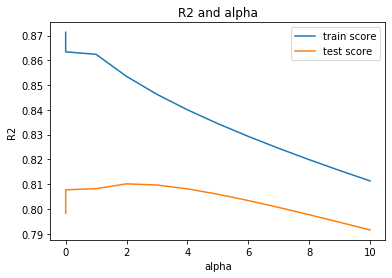

In [3649]:
# plotting mean test and train scoes with alpha 
cv_results1['param_alpha'] = cv_results1['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results1['param_alpha'], cv_results1['mean_train_score'])
plt.plot(cv_results1['param_alpha'], cv_results1['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')
plt.title("R2 and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [3650]:
#Obtaining best Ridge alpha value and corresponding test R2 score
print(model_cv_Ridge.best_params_)
print(model_cv_Ridge.best_score_)

{'alpha': 2.0}
0.810117297446469


In [3651]:
#Obtaining optimal ridge coefficients for best ridge alpha value of 2
bestalpharidge = 2.0
optimalridge = Ridge(alpha=bestalpharidge)

optimalridge.fit(X_train, y_train)
optimalridge.coef_

array([-0.03611897,  0.1237479 ,  0.14257143,  0.04519039,  0.00260454,
        0.14359541,  0.27574377,  0.15113214,  0.00835689,  0.28970115,
        0.15428961, -0.11010107, -0.08278043, -0.10227722, -0.04080673,
       -0.05073609, -0.0146146 , -0.03741006, -0.00659774,  0.13094288,
        0.06977167,  0.09934292,  0.06229787, -0.03606703, -0.03086283,
        0.02722966, -0.03606703, -0.00659774,  0.03701422,  0.05474098,
        0.07142096,  0.1045378 , -0.16899577,  0.01811637, -0.08802022,
       -0.03762097,  0.08025407, -0.09663164, -0.03762097, -0.00076152,
       -0.05315533, -0.0074098 , -0.08260266, -0.06588497, -0.01297471,
       -0.00076152, -0.0074098 ,  0.09126013,  0.05589407,  0.06374237])

In [3652]:
#Running the lasso model with Gridsearch CV
lasso = Lasso()

# cross validation
model_cv_Lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_Lasso.fit(X_train, y_train) 

Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    1.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.0004, 0.0006, 0.0008,
                                   0.001, 0.002, 0.004, 0.006, 0.008, 0.01,
                                   0.02, 0.04, 0.05, 0.06, 0.08, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [3653]:
#Checking the results dataframe
cv_results2 = pd.DataFrame(model_cv_Lasso.cv_results_)
cv_results2.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.136679,0.250923,0.001596,0.000488,0.0001,{'alpha': 0.0001},0.859589,0.603003,0.791116,0.861787,0.890449,0.801246,0.104300,1,0.862776,0.901351,0.860410,0.859711,0.850895,0.867028,0.017628
1,0.008974,0.002443,0.001596,0.000489,0.0002,{'alpha': 0.0002},0.863244,0.623438,0.781963,0.851557,0.878963,0.799895,0.094200,3,0.854446,0.895123,0.852910,0.852560,0.841964,0.859401,0.018404
2,0.005789,0.001169,0.001400,0.000491,0.0004,{'alpha': 0.0004},0.861785,0.655621,0.780785,0.837716,0.865997,0.800441,0.078483,2,0.833545,0.879881,0.842468,0.836852,0.825162,0.843581,0.018996
3,0.004388,0.000488,0.001197,0.000399,0.0006,{'alpha': 0.0006},0.853240,0.682782,0.779169,0.826202,0.855270,0.799385,0.064407,4,0.815331,0.864569,0.833884,0.820887,0.810381,0.829010,0.019434
4,0.004986,0.001261,0.001795,0.000746,0.0008,{'alpha': 0.0008},0.845902,0.702471,0.775501,0.818105,0.847760,0.797995,0.054412,5,0.809057,0.852088,0.828034,0.815013,0.804637,0.821766,0.017084


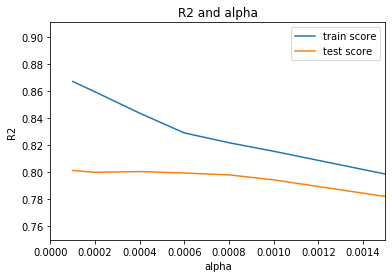

In [3654]:
# plotting mean test and train scoes with alpha 
cv_results2['param_alpha'] = cv_results2['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results2['param_alpha'], cv_results2['mean_train_score'])
plt.plot(cv_results2['param_alpha'], cv_results2['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')
plt.xlim(right = 0.0015)
plt.xlim(left = 0)
plt.ylim(bottom = 0.75)
plt.title("R2 and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [3655]:
#Checking optimal lasso value and best test R2 score
print(model_cv_Lasso.best_params_)
print(model_cv_Lasso.best_score_)

{'alpha': 0.0001}
0.8012460222138628


In [3656]:
#Running a lasso model with optimal lasso alpha value
bestalphalasso = 0.0001

optimallasso = Lasso(alpha=bestalphalasso)
        
optimallasso.fit(X_train, y_train) 

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [3657]:
#Checking optimal lasso coefficients
optimallasso.coef_

array([-6.02551113e-02,  1.73704556e-01,  1.71851043e-01,  3.81493171e-02,
       -0.00000000e+00,  6.63680650e-02,  6.24132152e-02,  0.00000000e+00,
       -1.18964273e-02,  7.20733907e-01,  1.47079184e-01, -1.90170202e-01,
       -1.63454796e-01, -8.40085627e-02, -0.00000000e+00, -2.28752719e-02,
       -0.00000000e+00,  0.00000000e+00, -6.87182735e-03,  1.82292539e-01,
        1.13346491e-01,  1.42459116e-01,  1.08760860e-01, -8.33915600e-02,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -5.20828833e-05,
        2.63628036e-02,  3.70088560e-02,  4.45072484e-02,  1.72667514e-01,
       -4.91072236e-01,  0.00000000e+00, -8.84890956e-02, -4.77556611e-02,
        7.53056448e-02, -1.05029803e-01, -1.70029190e-05, -0.00000000e+00,
       -4.94098458e-02, -0.00000000e+00, -8.16519354e-02, -6.67526301e-02,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  8.63716911e-02,
        5.33295289e-02,  6.17355974e-02])

In [3658]:
#Checking X_train variables
X_train.columns

Index(['LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'GarageCars', 'PoolArea', 'AgeofHousesinceBuilt',
       'AgeofRemodelledHouseatSale', 'TimeforRemodelsinceBuilt',
       'AgeofGaragesinceBuilt', 'AgeofGaragesinceRemodel', 'AgeofGarageatSale',
       'NoGarageGarageFinish',
       'Floatingvillageresidentialzoningclassification',
       'Residentialhighdensityzoningclassification',
       'Residentiallowdensityzoningclassification',
       'Residentialmediumdensityzoningclassification', 'NoBasementBsmtQual',
       'PoorHeatingQC', 'ShedRoofStyle', 'NoBasementBsmtFinType1',
       'NoGarageGarageType', '1.5UnfHouseStyle', 'FeederProximityCondition2',
       'NormalProximityCondition2', 'PosAProximityCondition2',
       'PosNProximityCondition2', 'RRNnProximityCondition2', 'FairOverallCond',
       'VeryPoorOverallCond', 'ExcellentOverallQual', 'PoorOverallQual',
       'VeryPoorOv

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 <a list of 50 Text xticklabel objects>)

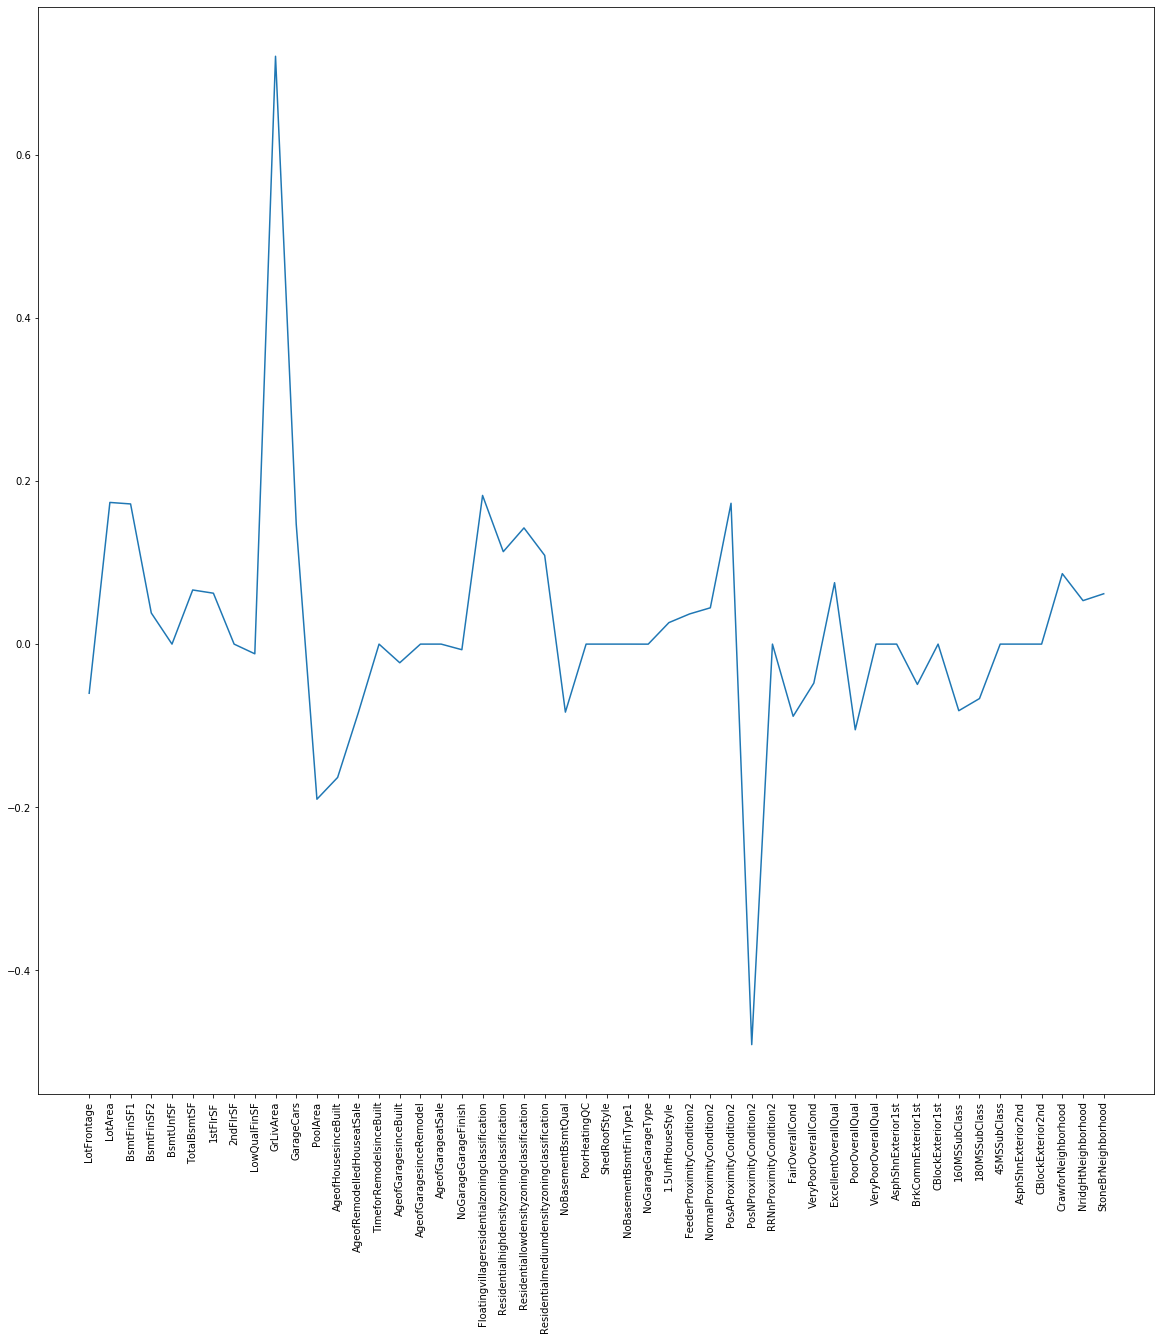

In [3659]:
#Plotting variables against lasso coefficients
plt.figure(figsize=(20, 20))
plt.plot(X_train.columns, optimallasso.coef_)
plt.xticks(rotation = 90)

In [3660]:
#Checking the variables and their coefficients
list(zip(X_train.columns,optimallasso.coef_))

[('LotFrontage', -0.06025511126969703),
 ('LotArea', 0.17370455607956428),
 ('BsmtFinSF1', 0.1718510432851105),
 ('BsmtFinSF2', 0.03814931708270423),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.06636806496756047),
 ('1stFlrSF', 0.06241321519196771),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.01189642725212138),
 ('GrLivArea', 0.72073390719455),
 ('GarageCars', 0.14707918425459715),
 ('PoolArea', -0.19017020179821556),
 ('AgeofHousesinceBuilt', -0.1634547964896301),
 ('AgeofRemodelledHouseatSale', -0.08400856267363818),
 ('TimeforRemodelsinceBuilt', -0.0),
 ('AgeofGaragesinceBuilt', -0.022875271910027778),
 ('AgeofGaragesinceRemodel', -0.0),
 ('AgeofGarageatSale', 0.0),
 ('NoGarageGarageFinish', -0.006871827345874304),
 ('Floatingvillageresidentialzoningclassification', 0.18229253918203628),
 ('Residentialhighdensityzoningclassification', 0.11334649145184666),
 ('Residentiallowdensityzoningclassification', 0.1424591159520809),
 ('Residentialmediumdensityzoningclassification', 0.1087608598806

In [3661]:
#Creating a dataframe
dataframeLasso = pd.DataFrame({'Variables':X_train.columns, 'Importance':optimallasso.coef_})

In [3662]:
#Sorting by importance
dataframeLasso.sort_values(by = ['Importance'])

,Variables,Importance
32,PosNProximityCondition2,-0.491072
11,PoolArea,-0.190170
12,AgeofHousesinceBuilt,-0.163455
37,PoorOverallQual,-0.105030
34,FairOverallCond,-0.088489
13,AgeofRemodelledHouseatSale,-0.084009
23,NoBasementBsmtQual,-0.083392
42,160MSSubClass,-0.081652
43,180MSSubClass,-0.066753
0,LotFrontage,-0.060255


The importance of the Lasso variables are based on the absolute value of their coefficients (higher magnitude indicates they will impact the house price target variable more, while the sign indicates the direction of effect). Accordingly, these variables in order of magnitude are: 
GrLivArea,  #Above grade (ground) living area square feet (Positively related)
PosNProximityCondition2, #Proximity to various conditions: Near positive off-site feature--park, greenbelt, etc. (Negatively related)
PoolArea #Pool area in square feet (Negatively related)
Floatingvillageresidentialzoningclassification, #Floating Village Residential Zoning Classification of sale (Positively related)
LotArea, #Lot size in square feet (Positively related)
PosAProximityCondition2 #Proximity to various conditions: Adjacent to postive off-site feature (Positively related)
BsmtFinSF1, #Type 1 finished square feet (Positively related)
AgeofHousesinceBuilt #The age of the house when sold (Negatively related)
GarageCars, #Size of garage in car capacity (Positively related)
Residentiallowdensityzoningclassification #Residential Low Density Zoning classification of sale (Positively related)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 <a list of 50 Text xticklabel objects>)

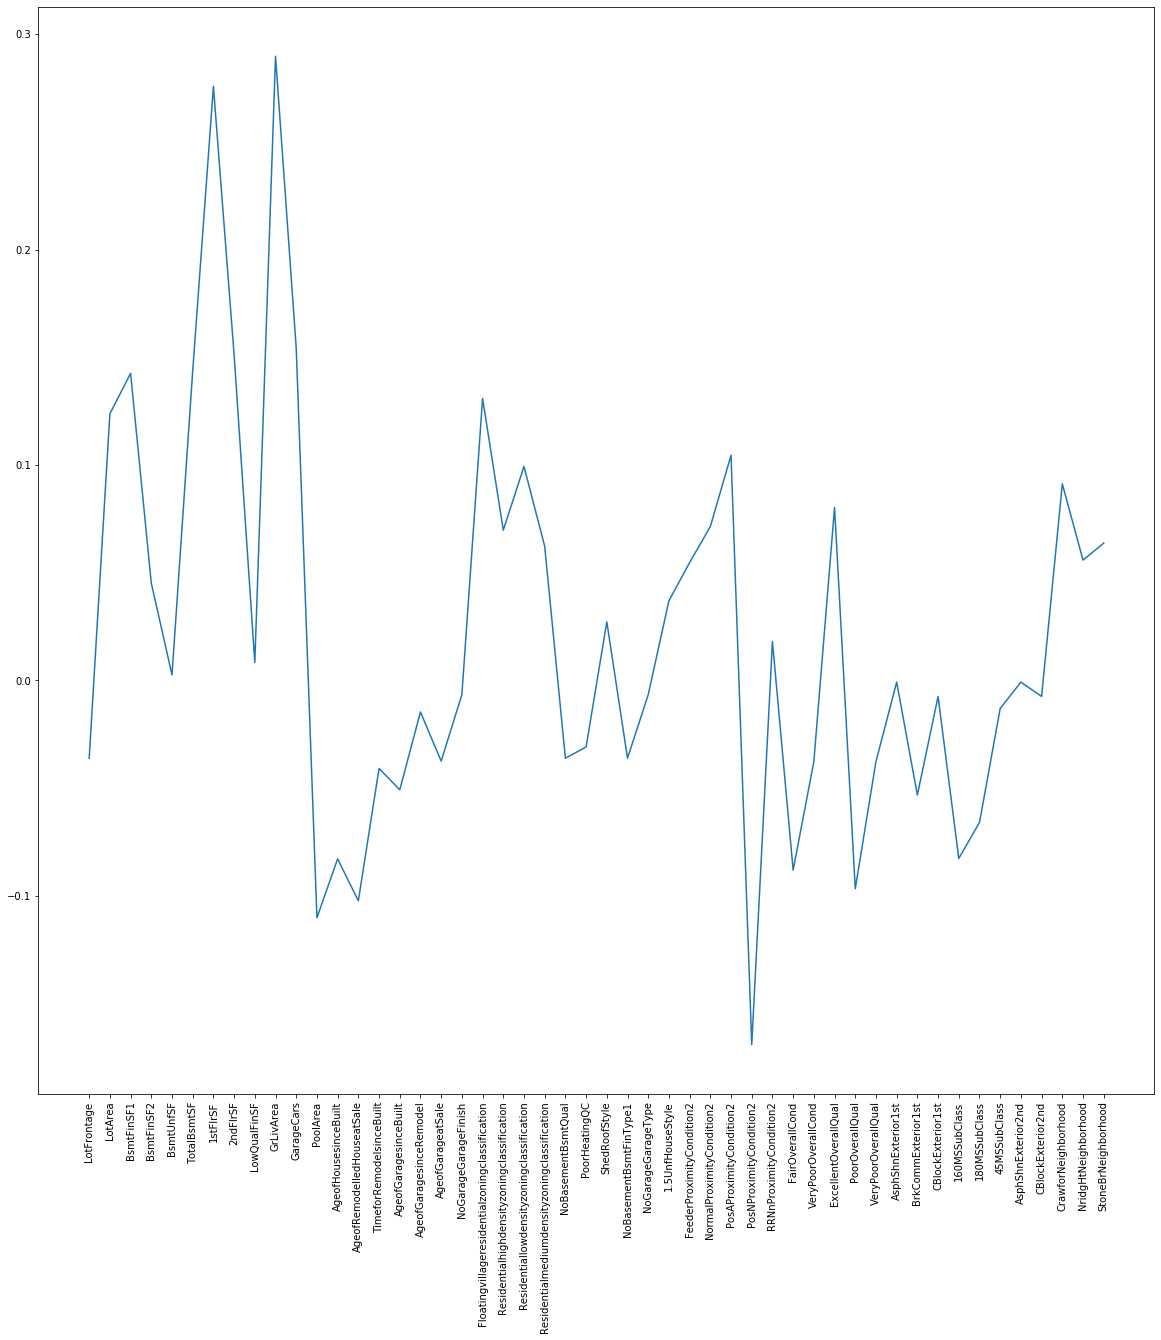

In [3663]:
#Plotting variables against the Ridge coefficient values
plt.figure(figsize=(20, 20))
plt.plot(X_train.columns, optimalridge.coef_)
plt.xticks(rotation = 90)

In [3664]:
#Checking the ridge coefficients and their corresponding variables
list(zip(X_train.columns,optimalridge.coef_))

[('LotFrontage', -0.03611896890829516),
 ('LotArea', 0.12374789508213262),
 ('BsmtFinSF1', 0.1425714283657342),
 ('BsmtFinSF2', 0.04519039454746778),
 ('BsmtUnfSF', 0.002604536884471515),
 ('TotalBsmtSF', 0.14359541430790568),
 ('1stFlrSF', 0.2757437743582814),
 ('2ndFlrSF', 0.15113213648195267),
 ('LowQualFinSF', 0.008356892947747607),
 ('GrLivArea', 0.28970114660474666),
 ('GarageCars', 0.15428961303444483),
 ('PoolArea', -0.1101010669387823),
 ('AgeofHousesinceBuilt', -0.08278042630008095),
 ('AgeofRemodelledHouseatSale', -0.10227721916023935),
 ('TimeforRemodelsinceBuilt', -0.04080672852061852),
 ('AgeofGaragesinceBuilt', -0.05073609241255472),
 ('AgeofGaragesinceRemodel', -0.01461459873829136),
 ('AgeofGarageatSale', -0.03741006319454086),
 ('NoGarageGarageFinish', -0.00659774455099814),
 ('Floatingvillageresidentialzoningclassification', 0.13094287916864178),
 ('Residentialhighdensityzoningclassification', 0.06977167178575042),
 ('Residentiallowdensityzoningclassification', 0.099

In [3665]:
#Creating a dataframe
dataframeRidge = pd.DataFrame({'Variables':X_train.columns, 'Importance':optimalridge.coef_})

In [3666]:
#Sorting by importance
dataframeRidge.sort_values(by = ['Importance'])

,Variables,Importance
32,PosNProximityCondition2,-0.168996
11,PoolArea,-0.110101
13,AgeofRemodelledHouseatSale,-0.102277
37,PoorOverallQual,-0.096632
34,FairOverallCond,-0.088020
12,AgeofHousesinceBuilt,-0.082780
42,160MSSubClass,-0.082603
43,180MSSubClass,-0.065885
40,BrkCommExterior1st,-0.053155
15,AgeofGaragesinceBuilt,-0.050736


The importance of the Ridge variables are based on the absolute value of their coefficients (higher magnitude indicates they will impact the house price target variable more, while the sign indicates the direction of effect). Accordingly, these variables in order of magnitude are: 
GrLivArea,  #Above grade (ground) living area square feet (Positively related)
1stFlrSF, #First Floor square feet (Positively related)
PosNProximityCondition2, #Proximity to various conditions: Near positive off-site feature--park, greenbelt, etc. (Negatively related)
GarageCars, #Size of garage in car capacity (Positively related)
2ndFlrSF, #Second floor square feet (Positively related)
TotalBsmtSF, #Total square feet of basement area (Positively related)
BsmtFinSF1, #Type 1 finished square feet (Positively related)
Floatingvillageresidentialzoningclassification, #Floating Village Residential Zoning Classification of sale (Positively related)
LotArea, #Lot size in square feet (Positively related)
PoolArea. #Pool area in square feet (Negatively related)

### For additional assignment questions

In [3667]:
# Fitting a Ridge model with double the optimal alpha value.
doublealpharidge = 4.0
doubleridge = Ridge(alpha=doublealpharidge)

doubleridge.fit(X_train, y_train)
doubleridge.coef_

array([-0.00692182,  0.09298355,  0.13054791,  0.04451934,  0.00965062,
        0.13502091,  0.23650106,  0.14826684,  0.00640764,  0.25579469,
        0.15494633, -0.0670163 , -0.08229762, -0.10519631, -0.03882522,
       -0.04783038, -0.01349179, -0.04067974, -0.01003397,  0.09553583,
        0.04108306,  0.07176569,  0.0313451 , -0.03537692, -0.01780049,
        0.01815985, -0.03537692, -0.01003397,  0.02222728,  0.0273338 ,
        0.0521798 ,  0.06052026, -0.09685076,  0.00649176, -0.08289459,
       -0.02534915,  0.08041533, -0.07350045, -0.02534915,  0.00090586,
       -0.03858659, -0.00596105, -0.07810433, -0.05277984, -0.00453656,
        0.00090586, -0.00596105,  0.0902361 ,  0.05691463,  0.05948672])

In [3668]:
#Creating a dataframe
dataframedoubleRidge = pd.DataFrame({'Variables':X_train.columns, 'Importance':doubleridge.coef_})

In [3669]:
#Sorting by importance
dataframedoubleRidge.sort_values(by = ['Importance'])

,Variables,Importance
13,AgeofRemodelledHouseatSale,-0.105196
32,PosNProximityCondition2,-0.096851
34,FairOverallCond,-0.082895
12,AgeofHousesinceBuilt,-0.082298
42,160MSSubClass,-0.078104
37,PoorOverallQual,-0.073500
11,PoolArea,-0.067016
43,180MSSubClass,-0.052780
15,AgeofGaragesinceBuilt,-0.047830
17,AgeofGarageatSale,-0.040680


When the value of the ridge alpha is doubled to 4, the most important predictors in terms of absolute values of coefficients are: 
GrLivArea #Above grade (ground) living area square feet (Positively related)
1stFlrSF #First Floor square feet (Positively related)
GarageCars #Size of garage in car capacity (Positively related)
2ndFlrSF #Second floor square feet (Positively related)
TotalBsmtSF #Total square feet of basement area (Positively related)

In [3670]:
# Fitting a lasso model with double the optimal alpha value.  We can see that when doubled, more coefficients are now reduced to zero.
doublealphalasso = 0.0002
doublelasso = Lasso(alpha=doublealphalasso)

doublelasso.fit(X_train, y_train)
doublelasso.coef_

array([-1.87297274e-02,  1.24598991e-01,  1.51174563e-01,  3.06987869e-02,
       -0.00000000e+00,  4.20632775e-02,  7.70251824e-02,  0.00000000e+00,
       -5.72791618e-03,  6.99942300e-01,  1.48995971e-01, -1.49751261e-01,
       -1.64533238e-01, -8.65768574e-02, -0.00000000e+00, -1.56138801e-02,
       -0.00000000e+00,  0.00000000e+00, -1.02765623e-02,  1.20386281e-01,
        5.10538107e-02,  8.68122046e-02,  5.17645660e-02, -8.59760671e-02,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -1.00668191e-04,
        1.71666812e-02,  0.00000000e+00,  2.08513075e-02,  4.64514181e-02,
       -3.95129233e-01,  0.00000000e+00, -9.21822070e-02, -0.00000000e+00,
        7.48489901e-02, -8.18801973e-02, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -7.37149729e-02, -4.49894127e-02,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  8.51406397e-02,
        5.19674260e-02,  5.65092303e-02])

In [3671]:
#Creating a datafrane
dataframedoubleLasso = pd.DataFrame({'Variables':X_train.columns, 'Importance':doublelasso.coef_})

In [3672]:
#Sorting by importance
dataframedoubleLasso.sort_values(by = ['Importance'])

,Variables,Importance
32,PosNProximityCondition2,-0.395129
12,AgeofHousesinceBuilt,-0.164533
11,PoolArea,-0.149751
34,FairOverallCond,-0.092182
13,AgeofRemodelledHouseatSale,-0.086577
23,NoBasementBsmtQual,-0.085976
37,PoorOverallQual,-0.081880
42,160MSSubClass,-0.073715
43,180MSSubClass,-0.044989
0,LotFrontage,-0.018730


When the value of the lasso alpha is doubled to 0.0002, the most important predictors in terms of absolute values of coefficients are: 
GrLivArea #Above grade (ground) living area square feet (Positively related)
PosNProximityCondition2 #Proximity to various conditions: Near positive off-site feature--park, greenbelt, etc. (Negatively related)
AgeofHousesinceBuilt #Age of house at sale (Negatively related)
BsmtFinSF1 #Type 1 finished square feet (Positively related)
PoolArea #Pool area in square feet (Negatively related)

For Question 3 of the additional questions, we will rerun the lasso model after dropping the five most important predictor variables when the model uses the optimal lasso alpha of 0.0001.

In [3673]:
#Reassigning y_train to y_train2 and creating X_train2 which excludes the 5 most important predicotrs of the earlier lasso model
y_train2 = y_train
X_train2 = df_train.drop(['GrLivArea', 'PosNProximityCondition2', 'PoolArea', 'Floatingvillageresidentialzoningclassification','LotArea'], axis = 1)

In [3674]:
#The dropped predictors are now not in this new dataframe
X_train2.head()

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,AgeofHousesinceBuilt,AgeofRemodelledHouseatSale,TimeforRemodelsinceBuilt,AgeofGaragesinceBuilt,AgeofGaragesinceRemodel,AgeofGarageatSale,NoGarageGarageFinish,RFnGarageFinish,UnfGarageFinish,ModeratelyirregularLotShape,RegularLotShape,SlightlyirregularLotShape,Fairkitchenquality,Goodkitchenquality,TypicalAveragekitchenquality,Excellentexteriormaterialquality,Fairexteriormaterialquality,Goodexteriormaterialquality,Brickfacemasonryveneertype,Nomasonryveneertype,Stonemasonryveneertype,Residentialhighdensityzoningclassification,Residentiallowdensityzoningclassification,Residentialmediumdensityzoningclassification,Lotconfigculdesac,Lotconfigfrontage2sides,Lotconfigfrontage3sides,Lotconfiginside,GoodBsmtExposure,MinimumBsmtExposure,NoBasementBsmtExposure,NoBsmtExposure,FairBsmtQual,GoodBsmtQual,NoBasementBsmtQual,TypicalBsmtQual,FairHeatingQC,GoodHeatingQC,PoorHeatingQC,TypicalaverageHeatingQC,CinderblockFoundation,PouredconcreteFoundation,SlabFoundation,StoneFoundation,WoodFoundation,GableRoofStyle,GambrelRoofStyle,HipRoofStyle,MansardRoofStyle,ShedRoofStyle,FairFireplaceQu,GoodFireplaceQu,NoFireplaceFireplaceQu,PoorFireplaceQu,TypicalaverageFireplaceQu,AveragerecroomBsmtFinType1,BelowaveragelivingquartersBsmtFinType1,GoodlivingquartersBsmtFinType1,LowqualityBsmtFinType1,NoBasementBsmtFinType1,UnfinishedBsmtFinType1,AttachedGarageType,BasementGarageType,BuiltinGarageType,CarPort,DetachedGarageType,NoGarageGarageType,1.5UnfHouseStyle,2.5FinHouseStyle,2.5UnfHouseStyle,2StoryHouseStyle,OneStoryHouseStyle,SplitFoyerHouseStyle,SplitLevelHouseStyle,FeederProximityCondition2,NormalProximityCondition2,PosAProximityCondition2,RRAeProximityCondition2,RRAnProximityCondition2,RRNnProximityCondition2,AverageOverallCond,BelowAverageOverallCond,ExcellentOverallCond,FairOverallCond,GoodOverallCond,PoorOverallCond,VeryGoodOverallCond,VeryPoorOverallCond,AverageOverallQual,BelowAverageOverallQual,ExcellentOverallQual,FairOverallQual,GoodOverallQual,PoorOverallQual,VeryExcellentOverallQual,VeryGoodOverallQual,VeryPoorOverallQual,AsphShnExterior1st,BrkCommExterior1st,BrkFaceExterior1st,CBlockExterior1st,CemntBdExterior1st,HdBoardExterior1st,ImStuccExterior1st,MetalSdExterior1st,PlywoodExterior1st,StoneExterior1st,StuccoExterior1st,VinylSdExterior1st,WdSdngExterior1st,WdShingExterior1st,160MSSubClass,180MSSubClass,190MSSubClass,20MSSubClass,30MSSubClass,40MSSubClass,45MSSubClass,50MSSubClass,60MSSubClass,70MSSubClass,75MSSubClass,80MSSubClass,85MSSubClass,90MSSubClass,AsphShnExterior2nd,Brk Cmn,BrkFaceExterior2nd,CBlockExterior2nd,CmentBd,HdBoardExterior2nd,ImStuccExterior2nd,MetalSdExterior2nd,OtherExterior2nd,PlywoodExterior2nd,StoneExterior2nd,StuccoExterior2nd,VinylSdExterior2nd,Wd Shng,WdSdngExterior2nd,BluesteNeighborhood,BrDaleNeighborhood,BrkSideNeighborhood,ClearCrNeighborhood,CollgCrNeighborhood,CrawforNeighborhood,EdwardsNeighborhood,GilbertNeighborhood,IDOTRRNeighborhood,MeadowVNeighborhood,MitchelNeighborhood,NAmesNeighborhood,NPkVillNeighborhood,NWAmesNeighborhood,NoRidgeNeighborhood,NridgHtNeighborhood,OldTownNeighborhood,SWISUNeighborhood,SawyerNeighborhood,SawyerWNeighborhood,SomerstNeighborhood,StoneBrNeighborhood,TimberNeighborhood,VeenkerNeighborhood
210,0.157534,0.00,0.082920,0.0,0.169521,0.141408,0.113889,0.000000,0.0,0.333333,0.333333,0.0,0.250,0.181818,0.000000,0.00,0.000000,0.000000,0.000000,0.173913,0.0,0.0,0.0,0.610294,0.967213,0.203252,0.629371,1.000000,0.028037,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31

In [3675]:
#Running a new model with up to 50 variables using RFE, taking the X_train2 and y_train2 dataframes.
lm2 = LinearRegression()
lm2.fit(X_train2, y_train2)

rfe2 = RFE(lm2, 50)
rfe2 = rfe2.fit(X_train2, y_train2)

In [3676]:
#Examing the predictors
list(zip(X_train2.columns,rfe2.support_,rfe2.ranking_))

[('LotFrontage', False, 29),
 ('MasVnrArea', False, 90),
 ('BsmtFinSF1', False, 17),
 ('BsmtFinSF2', False, 25),
 ('BsmtUnfSF', False, 18),
 ('TotalBsmtSF', False, 23),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 85),
 ('BsmtFullBath', True, 1),
 ('FullBath', False, 7),
 ('HalfBath', False, 48),
 ('BedroomAbvGr', False, 115),
 ('TotRmsAbvGrd', False, 43),
 ('Fireplaces', False, 124),
 ('GarageCars', True, 1),
 ('GarageArea', False, 118),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', False, 120),
 ('EnclosedPorch', False, 30),
 ('3SsnPorch', False, 21),
 ('ScreenPorch', True, 1),
 ('MiscVal', True, 1),
 ('AgeofHousesinceBuilt', True, 1),
 ('AgeofRemodelledHouseatSale', True, 1),
 ('TimeforRemodelsinceBuilt', False, 3),
 ('AgeofGaragesinceBuilt', False, 2),
 ('AgeofGaragesinceRemodel', False, 6),
 ('AgeofGarageatSale', False, 5),
 ('NoGarageGarageFinish', True, 1),
 ('RFnGarageFinish', False, 122),
 ('UnfGarageFinish', False, 100),
 ('ModeratelyirregularLotShape

In [3677]:
#Storing predictors with RFE support in the new model in col2
col2 = X_train2.columns[rfe2.support_]
col2

Index(['1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'GarageCars', 'WoodDeckSF',
       'ScreenPorch', 'MiscVal', 'AgeofHousesinceBuilt',
       'AgeofRemodelledHouseatSale', 'NoGarageGarageFinish',
       'Fairexteriormaterialquality', 'NoBasementBsmtQual', 'PoorHeatingQC',
       'NoBasementBsmtFinType1', 'AttachedGarageType', 'BasementGarageType',
       'BuiltinGarageType', 'CarPort', 'DetachedGarageType',
       'NoGarageGarageType', '1.5UnfHouseStyle', 'FeederProximityCondition2',
       'NormalProximityCondition2', 'PosAProximityCondition2',
       'RRAeProximityCondition2', 'RRAnProximityCondition2',
       'RRNnProximityCondition2', 'BelowAverageOverallCond', 'FairOverallCond',
       'VeryPoorOverallCond', 'ExcellentOverallQual', 'GoodOverallQual',
       'PoorOverallQual', 'VeryExcellentOverallQual', 'VeryGoodOverallQual',
       'BrkCommExterior1st', 'BrkFaceExterior1st', 'CBlockExterior1st',
       '160MSSubClass', '180MSSubClass', '30MSSubClass', '45MSSubClass',
       'CBlockE

In [3678]:
#Storing RFE predictors in X_train2
X_train2 = X_train2[col2]

In [3679]:
#Running the lasso model again, this time with the new training dataframes
lasso2 = Lasso()

# cross validation
model_cv_Lasso2 = GridSearchCV(estimator = lasso2, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_Lasso2.fit(X_train2, y_train2) 

Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    1.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.0004, 0.0006, 0.0008,
                                   0.001, 0.002, 0.004, 0.006, 0.008, 0.01,
                                   0.02, 0.04, 0.05, 0.06, 0.08, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [3680]:
#Obtaining optimal alpha value and test R2 score
print(model_cv_Lasso2.best_params_)
print(model_cv_Lasso2.best_score_)

{'alpha': 0.0002}
0.8551358241620588


In [3681]:
 #Fitting a model with the new optimal lasso alpha value of 0.0002
bestalphalasso2 = 0.0002

newvariableslasso = Lasso(alpha=bestalphalasso2)
        
newvariableslasso.fit(X_train2, y_train2) 

Lasso(alpha=0.0002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [3682]:
newvariableslasso.coef_ #Examining coefficients of the new lasso model

array([ 0.49678075,  0.20226098,  0.0815422 ,  0.1233433 ,  0.05425463,
        0.04349629,  0.        , -0.10132804, -0.06211751, -0.        ,
       -0.05050452, -0.07826678, -0.        , -0.        ,  0.03636723,
       -0.        ,  0.02241572, -0.02920912,  0.00055694, -0.        ,
        0.        ,  0.        ,  0.04142581,  0.        ,  0.        ,
       -0.        ,  0.        , -0.0473562 , -0.09807664, -0.        ,
        0.14602601,  0.04058714, -0.14120754,  0.09569377,  0.08432845,
       -0.        ,  0.05540743,  0.        , -0.05309744, -0.02079274,
       -0.06110066, -0.        ,  0.        ,  0.05647002,  0.08186434,
       -0.08012692,  0.04075868,  0.04464469,  0.03643777,  0.04024041])

In [3683]:
#Creating a new dataframe 
dataframenewvariableslasso = pd.DataFrame({'Variables':X_train2.columns, 'Importance':newvariableslasso.coef_})

In [3684]:
#Sorting the values to find the most important predictors
dataframenewvariableslasso.sort_values(by = ['Importance'])

,Variables,Importance
32,PoorOverallQual,-0.141208
7,AgeofHousesinceBuilt,-0.101328
28,FairOverallCond,-0.098077
45,MeadowVNeighborhood,-0.080127
11,NoBasementBsmtQual,-0.078267
8,AgeofRemodelledHouseatSale,-0.062118
40,30MSSubClass,-0.061101
38,160MSSubClass,-0.053097
10,Fairexteriormaterialquality,-0.050505
27,BelowAverageOverallCond,-0.047356


Now when the lasso model is run again with a new optimal lasso alpha of 0.0002, the most important variables are:
1stFlrSF (Positively related) #First Floor square feet
2ndFlrSF (Positively related) #Second floor square feet
ExcellentOverallQual (Positively related) #Rates the overall material and finish of the house: Excellent, rating 9
PoorOverallQual (Negatively related) #Rates the overall material and finish of the house: Poor, rating 2
GarageCars (Positively related) #Size of garage in car capacity